**Introduction**

Startup refers to a company that is in their first stages of operations.  They usually have high cost and limited revenue. They look for capital from a lot of sources like venture capitalists as they require a lot of capital to take it off the ground.

Startups go through multiple rounds of funding to raise capital. These different funding rounds allow outside investors to invest cash in exchange of equity or partial ownership of the company.

They can start off with “seed” funding or angel investor funding at the beginning, then the next funding rounds can be followed in Series A, B, C, etc.

The goal of most startups is to get acquired by a different company or become a publicly traded company.

Most startups fail due to various reasons e.g. bad product market fit, marketing problems, team problems etc. This happens within the first few years hence making startup investment risky.

Due to the risk factor people like angel investors and venture capitalists have a high risk while investing in startups.

To help startup investors with their decisions, in this project we aim to find the important features that lead to startup success and forecast a company’s success using machine learning methods.

**Research Objectives**




1.   To identify the critical features and factors that contribute to the success of startups.


2.   To develop a machine learning model that can predict the likelihood of success for startups based on various features and indicators.



**Research Questions**



1.  What are the key features that contribute to the success/failure of startups?

2. Which machine learning models provide the highest predictive accuracy for startup success based on historical data?
3. How do different machine learning models compare in terms of their ability to predict startup success?




**Scope**



1.   Data Analysis
2.   Data Cleaning
3.   Feature Engineering
4.   Feature Selection
5.   Modeling
6.   Model Training and Testing


**Assumptions**

We assume that the data in use is of high quality




In [139]:
#all the librarys required
import pandas as pd
import numpy as np
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from IPython.display import Image
#import pydotplus
#import graphviz
from six import StringIO
import six
import sys
sys.modules['sklearn.externals.six'] = six
#from sklearn.externals.six import StringIO
#from pydot import graph_from_dot_data
from sklearn.utils import resample
from sklearn.tree import export_graphviz
#import pydot
import random

Description of the data


Source: Datarade

It has around 54k rows and 39 columns. 

In [140]:
df = pd.read_csv('https://raw.githubusercontent.com/mercy98/STRINGS/master/startup.csv' , encoding='ISO-8859-1')
df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
# transposing the dataset
df.head().T

,0,1,2,3,4
permalink,/organization/waywire,/organization/tv-communications,/organization/rock-your-paper,/organization/in-touch-network,/organization/r-ranch-and-mine
name,#waywire,&TV Communications,'Rock' Your Paper,(In)Touch Network,-R- Ranch and Mine
homepage_url,http://www.waywire.com,http://enjoyandtv.com,http://www.rockyourpaper.org,http://www.InTouchNetwork.com,NaN
category_list,|Entertainment|Politics|Social Media|News|,|Games|,|Publishing|Education|,|Electronics|Guides|Coffee|Restaurants|Music|i...,|Tourism|Entertainment|Games|
market,News,Games,Publishing,Electronics,Tourism
funding_total_usd,"17,50,000","40,00,000","40,000","15,00,000","60,000"
status,acquired,operating,operating,operating,operating
country_code,USA,USA,EST,GBR,USA
state_code,NY,CA,NaN,NaN,TX
region,New York City,Los Angeles,Tallinn,London,Dallas


Getting familiar with our data

In [142]:
# date is not being read properly, some numerical values like funding_total_usd is being read as an object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [143]:
# size of the datadf.count()
df.describe

<bound method NDFrame.describe of                              permalink                name  \
0                /organization/waywire            #waywire   
1      /organization/tv-communications  &TV Communications   
2        /organization/rock-your-paper   'Rock' Your Paper   
3       /organization/in-touch-network   (In)Touch Network   
4       /organization/r-ranch-and-mine  -R- Ranch and Mine   
...                                ...                 ...   
54289                              NaN                 NaN   
54290                              NaN                 NaN   
54291                              NaN                 NaN   
54292                              NaN                 NaN   
54293                              NaN                 NaN   

                        homepage_url  \
0             http://www.waywire.com   
1              http://enjoyandtv.com   
2       http://www.rockyourpaper.org   
3      http://www.InTouchNetwork.com   
4                    

In [144]:
# size of the datadf.count()
df.shape

(54294, 39)

In [145]:
#check the column names
df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

Data Cleaning

To clean the data, we will remove extra spaces from different columns and also removed things like “ , ”, “ - ” where ever necessary. We make sure that columns that have numbers are being read as numbers and also convert all of the date columns into date data types.

Rows with null values removed.

In [146]:
# some of the columns have space in front. Removing spaces from the front.
df = df.rename(columns={' market ': "market", ' funding_total_usd ': "funding_total_usd"})

In [147]:
# the funding total column is read as a object so clearning it up so that we can use it as a numerical column

df['funding_total_usd']=df['funding_total_usd'].str.replace(',','') # removing commas from funding_total_usd column
df['funding_total_usd']=df['funding_total_usd'].str.replace(' ','')#removing extra space from funding_total_usd column
df['funding_total_usd']=df['funding_total_usd'].str.replace('-','0') #removing - from funding_total_usd column and replacing with 0

In [148]:
# turning column to number and coercing errors to NaN
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'], errors='coerce')

In [149]:
#turning all date columns in to date

# converting column into date and ignoring errors
df['founded_at'] =  pd.to_datetime(df['founded_at'], format='%Y-%m-%d', errors = 'coerce')
df['first_funding_at'] =  pd.to_datetime(df['first_funding_at'], format='%Y-%m-%d', errors = 'coerce')
df['last_funding_at'] =  pd.to_datetime(df['last_funding_at'], format='%Y-%m-%d', errors = 'coerce')
df['founded_year'] =  pd.to_datetime(df['founded_year'], format='%Y', errors = 'coerce')
df['founded_month'] =  pd.to_datetime(df['founded_month'], format='%Y-%m', errors = 'coerce')

#removing space from the beginning and end of market column
df.market = df.market.str.strip()

In [150]:
#check the shape of the data after dropping null values
df.shape

(54294, 39)

**Exploratory Data Analysis**

In [151]:
# the number of zeros in the dataset. Some columns have a lot of zeros
df.isin([0]).sum()

permalink                   0
name                        0
homepage_url                0
category_list               0
market                      0
funding_total_usd        8531
status                      0
country_code                0
state_code                  0
region                      0
city                        0
funding_rounds              0
founded_at                  0
founded_month               0
founded_quarter             0
founded_year                0
first_funding_at            0
last_funding_at             0
seed                    35598
venture                 26161
equity_crowdfunding     48916
undisclosed             48486
convertible_note        48881
debt_financing          45213
angel                   46309
grant                   48296
private_equity          48065
post_ipo_equity         49122
post_ipo_debt           49363
secondary_market        49419
product_crowdfunding    49225
round_A                 40435
round_B                 43991
round_C   

In [152]:
# number of values in each column
df.count()

permalink               49438
name                    49437
homepage_url            45989
category_list           45477
market                  45470
funding_total_usd       49438
status                  48124
country_code            44165
state_code              30161
region                  44165
city                    43322
funding_rounds          49438
founded_at              38553
founded_month           38482
founded_quarter         38482
founded_year            38482
first_funding_at        49428
last_funding_at         49432
seed                    49438
venture                 49438
equity_crowdfunding     49438
undisclosed             49438
convertible_note        49438
debt_financing          49438
angel                   49438
grant                   49438
private_equity          49438
post_ipo_equity         49438
post_ipo_debt           49438
secondary_market        49438
product_crowdfunding    49438
round_A                 49438
round_B                 49438
round_C   

In [153]:
#finding out unique values for each column
#comment -- permalink has the highest number of unique values, this is agood indicator that it would good to use it as a unique ID
df.nunique()

permalink               49436
name                    49350
homepage_url            45850
category_list           16675
market                    753
funding_total_usd       14617
status                      3
country_code              115
state_code                 61
region                   1089
city                     4188
funding_rounds             17
founded_at               3368
founded_month             420
founded_quarter           218
founded_year              103
first_funding_at         3904
last_funding_at          3651
seed                     3337
venture                  9300
equity_crowdfunding       252
undisclosed               687
convertible_note          299
debt_financing           1872
angel                     999
grant                     532
private_equity            847
post_ipo_equity           239
post_ipo_debt              57
secondary_market           20
product_crowdfunding      176
round_A                  2035
round_B                  1269
round_C   

In [154]:
 #some of the columns have a lot of zeros. Calculating zeros as apercentage of the total rows for each column
(df.isin([0]).sum()/df.count()) *100

permalink                0.000000
name                     0.000000
homepage_url             0.000000
category_list            0.000000
market                   0.000000
funding_total_usd       17.255957
status                   0.000000
country_code             0.000000
state_code               0.000000
region                   0.000000
city                     0.000000
funding_rounds           0.000000
founded_at               0.000000
founded_month            0.000000
founded_quarter          0.000000
founded_year             0.000000
first_funding_at         0.000000
last_funding_at          0.000000
seed                    72.005340
venture                 52.916785
equity_crowdfunding     98.944132
undisclosed             98.074356
convertible_note        98.873336
debt_financing          91.453942
angel                   93.670860
grant                   97.690036
private_equity          97.222784
post_ipo_equity         99.360816
post_ipo_debt           99.848295
secondary_mark

In [155]:
#unique values in status column
#status column have three different values, this is what we are going to use to predict against
df['status'].nunique()

3

In [156]:
df['country_code'].nunique() # no. of unique country code
#115 country code unique

115

In [157]:
df['country_code'].unique() #different unique values in country_code
#lot fo different countries

array(['USA', 'EST', 'GBR', 'ARG', nan, 'HKG', 'CHL', 'DEU', 'FRA', 'CHN',
       'CAN', 'AUS', 'ROM', 'NLD', 'SWE', 'RUS', 'DNK', 'IND', 'SGP',
       'NOR', 'BEL', 'IRL', 'ITA', 'ISR', 'ESP', 'THA', 'NZL', 'CZE',
       'CHE', 'BRA', 'HUN', 'JPN', 'BWA', 'KOR', 'NGA', 'FIN', 'TUR',
       'CRI', 'PRT', 'TWN', 'KHM', 'COL', 'UKR', 'LTU', 'ZAF', 'AUT',
       'PHL', 'ISL', 'BGR', 'URY', 'HRV', 'KEN', 'MEX', 'JOR', 'VNM',
       'GHA', 'PER', 'POL', 'IDN', 'PAN', 'LVA', 'ALB', 'UGA', 'LBN',
       'GRC', 'ARE', 'PAK', 'EGY', 'SVK', 'LUX', 'MYS', 'BHS', 'ARM',
       'DZA', 'MDA', 'TUN', 'NIC', 'TZA', 'CYP', 'NPL', 'BHR', 'CMR',
       'SRB', 'SAU', 'CYM', 'BRN', 'SLV', 'ECU', 'MLT', 'SVN', 'LAO',
       'TTO', 'MAR', 'MMR', 'BGD', 'DOM', 'BMU', 'LIE', 'MOZ', 'GTM',
       'AZE', 'MCO', 'ZWE', 'UZB', 'OMN', 'BLR', 'JEY', 'JAM', 'KWT',
       'MUS', 'CIV', 'SOM', 'MKD', 'GIB', 'SYC', 'MAF'], dtype=object)

In [158]:
#number of companies in each country_code
#most of the values are from USA
df.groupby('country_code')['name'].nunique().sort_values(ascending=False).head(50)

country_code
USA    28756
GBR     2642
CAN     1405
CHN     1238
DEU      966
FRA      866
IND      849
ISR      681
ESP      549
RUS      368
SWE      315
AUS      314
ITA      308
NLD      307
IRL      306
SGP      299
BRA      293
CHL      285
JPN      283
KOR      246
CHE      222
DNK      210
FIN      194
ARG      149
BEL      149
HKG      126
TUR      124
AUT      103
NOR       98
POL       94
MEX       83
PRT       69
BGR       68
ARE       66
NZL       62
ZAF       52
IDN       52
CZE       51
MYS       48
UKR       45
EST       44
TWN       41
HUN       41
THA       38
COL       35
PHL       32
LTU       31
GRC       31
PER       29
NGA       29
Name: name, dtype: int64

In [159]:
#sum of null values in each column
#dataset also has some null values. Some of the columns have a lot of null values eg. state code and founded years
df.isnull().sum()

permalink                4856
name                     4857
homepage_url             8305
category_list            8817
market                   8824
funding_total_usd        4856
status                   6170
country_code            10129
state_code              24133
region                  10129
city                    10972
funding_rounds           4856
founded_at              15741
founded_month           15812
founded_quarter         15812
founded_year            15812
first_funding_at         4866
last_funding_at          4862
seed                     4856
venture                  4856
equity_crowdfunding      4856
undisclosed              4856
convertible_note         4856
debt_financing           4856
angel                    4856
grant                    4856
private_equity           4856
post_ipo_equity          4856
post_ipo_debt            4856
secondary_market         4856
product_crowdfunding     4856
round_A                  4856
round_B                  4856
round_C   

In [160]:
df.isnull().sum()/df.count() *100 #percentage of null values in each column
#around 40% of the data does not have a founded date.
#City, region, state also have high number of null values so it would be good to leave these columns.

permalink                9.822404
name                     9.824625
homepage_url            18.058666
category_list           19.387822
market                  19.406202
funding_total_usd        9.822404
status                  12.821046
country_code            22.934450
state_code              80.013925
region                  22.934450
city                    25.326624
funding_rounds           9.822404
founded_at              40.829507
founded_month           41.089340
founded_quarter         41.089340
founded_year            41.089340
first_funding_at         9.844622
last_funding_at          9.835734
seed                     9.822404
venture                  9.822404
equity_crowdfunding      9.822404
undisclosed              9.822404
convertible_note         9.822404
debt_financing           9.822404
angel                    9.822404
grant                    9.822404
private_equity           9.822404
post_ipo_equity          9.822404
post_ipo_debt            9.822404
secondary_mark

In [161]:
#grouping status and descriptive analysis of funding rounds
#acquired companies also has more funding rounds
df.groupby('status')['funding_rounds'].describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
acquired,3692.0,2.013814,1.398832,1.0,1.0,2.0,3.0,15.0
closed,2603.0,1.434114,0.965478,1.0,1.0,1.0,2.0,11.0
operating,41829.0,1.689522,1.302072,1.0,1.0,1.0,2.0,18.0


In [162]:
#mean values of all columns and transposing it. Grouping by company status
columns_list = ['funding_rounds', 'funding_total_usd', 'seed', 'venture', 'equity_crowdfunding',
                'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
                'private_equity', 'post_ipo_equity', 'post_ipo_debt',
                'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
                'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']

grouped_data = df.groupby('status')[columns_list].mean().T
columns_list = grouped_data.columns.tolist()

#Findings
#Acquired companies has higher mean and median funding compared to closed and operating companies.
#Acquired companies also had more number of funding rounds compared to companies with closed and operating statuses.
#A lot of the companies raised venture and seed funding. The number of companies decreased as the companies proceeded to more series funding.
#Round G and H have a very low number of companies compared to round A and round B.

In [163]:
#median value of all columns and transposing it. Grouping by company status
# median values are not being that useful as there is a lot of zeros in the dataset
columns_list = ['funding_rounds', 'funding_total_usd', 'seed', 'venture', 'equity_crowdfunding',
                'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
                'private_equity', 'post_ipo_equity', 'post_ipo_debt',
                'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
                'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']

grouped_data = df.groupby('status')[columns_list].median().T
columns_list = grouped_data.columns.tolist()


In [164]:
columns_list = ['funding_rounds', 'funding_total_usd', 'seed', 'venture', 'equity_crowdfunding',
                'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
                'private_equity', 'post_ipo_equity', 'post_ipo_debt',
                'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
                'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']

grouped_data = df.groupby('status')[columns_list].sum().T
columns_list = grouped_data.columns.tolist()


<Axes: >

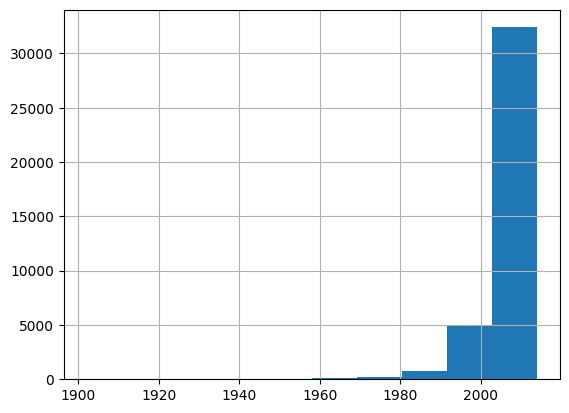

In [165]:
df['founded_year'].hist()#histogram of year variable
#most of the comapnies are around 2000

In [166]:
def year_group(row):
    # Extract the year from the Timestamp
    year = row['founded_year'].year if pd.notnull(row['founded_year']) else None

    if year is not None:
        if year >= 1900 and year <= 1925:
            return 'less_than_1925'
        elif year > 1925 and year <= 1950:
            return '1925_1950'
        elif year > 1950 and year <= 1975:
            return '1950_1975'
        elif year > 1975 and year <= 2000:
            return '1975_2000'
        elif year > 2000:
            return '2000_2014'
    return ''

df['founded_year_group'] =  df.apply(year_group, axis=1)

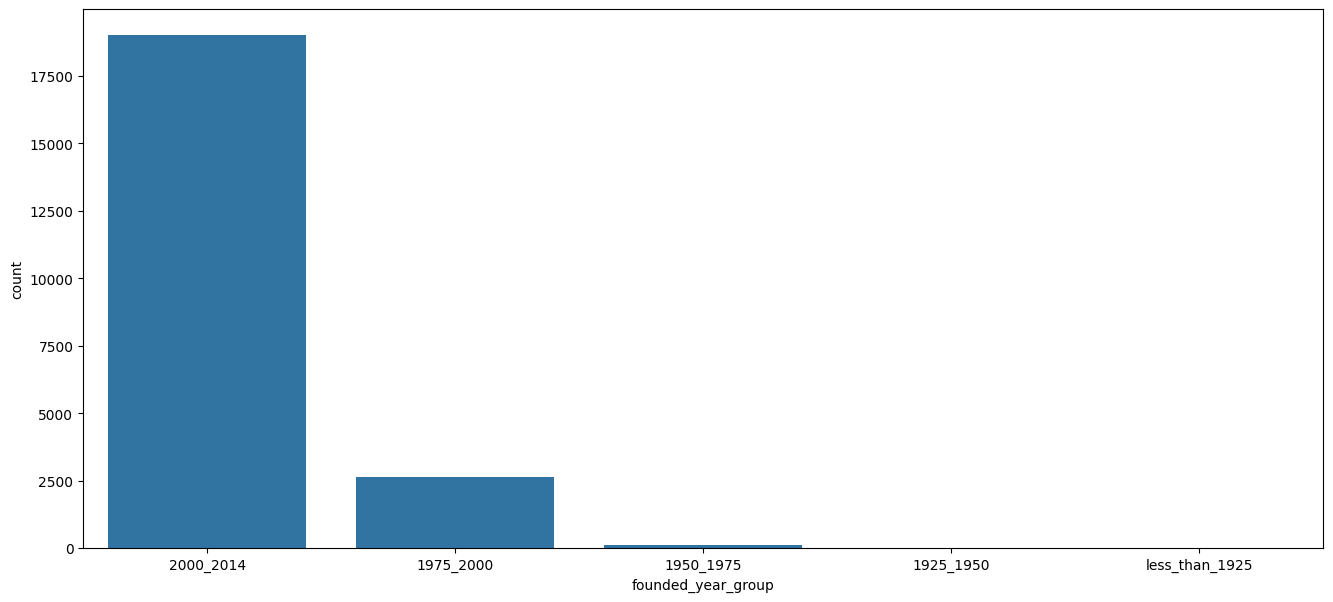

In [167]:
plt.figure(figsize = (16,7))
sns.countplot(x = 'founded_year_group', data = df.dropna())
plt.show()
#Most start-ups were founded after 2000

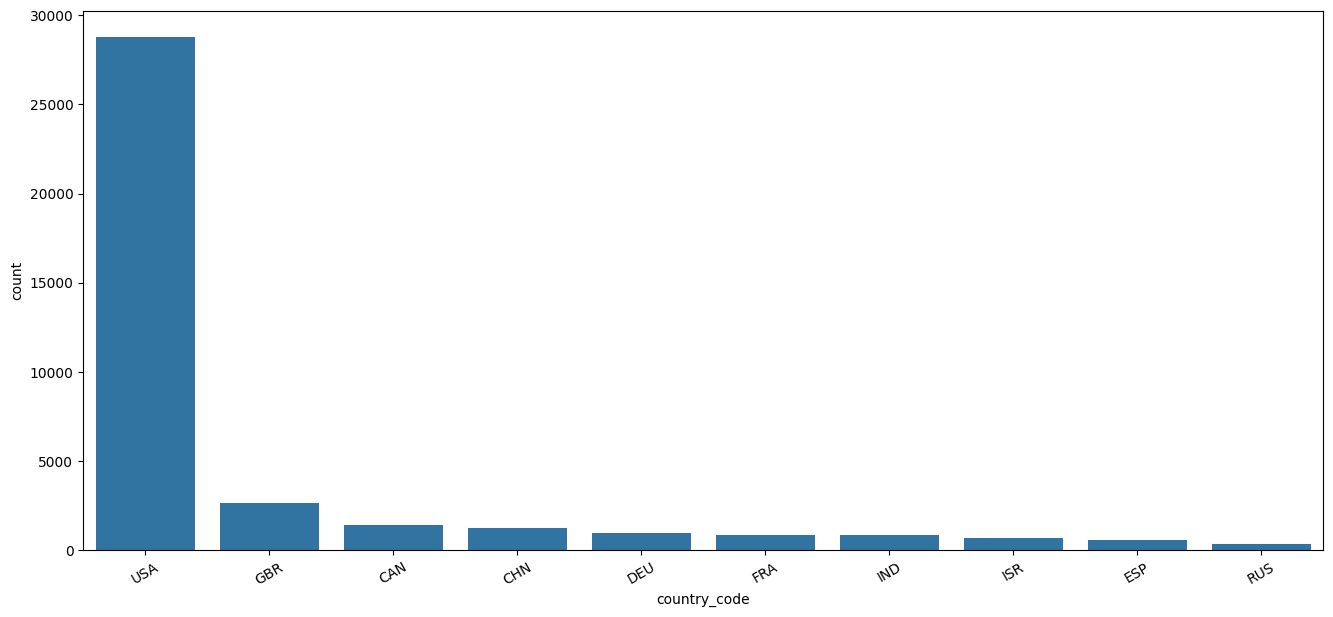

In [168]:
plt.figure(figsize=(16,7))
g = sns.countplot(x ='country_code', data = df, order=df['country_code'].value_counts().iloc[:10].index)
plt.xticks(rotation=30)
plt.show()

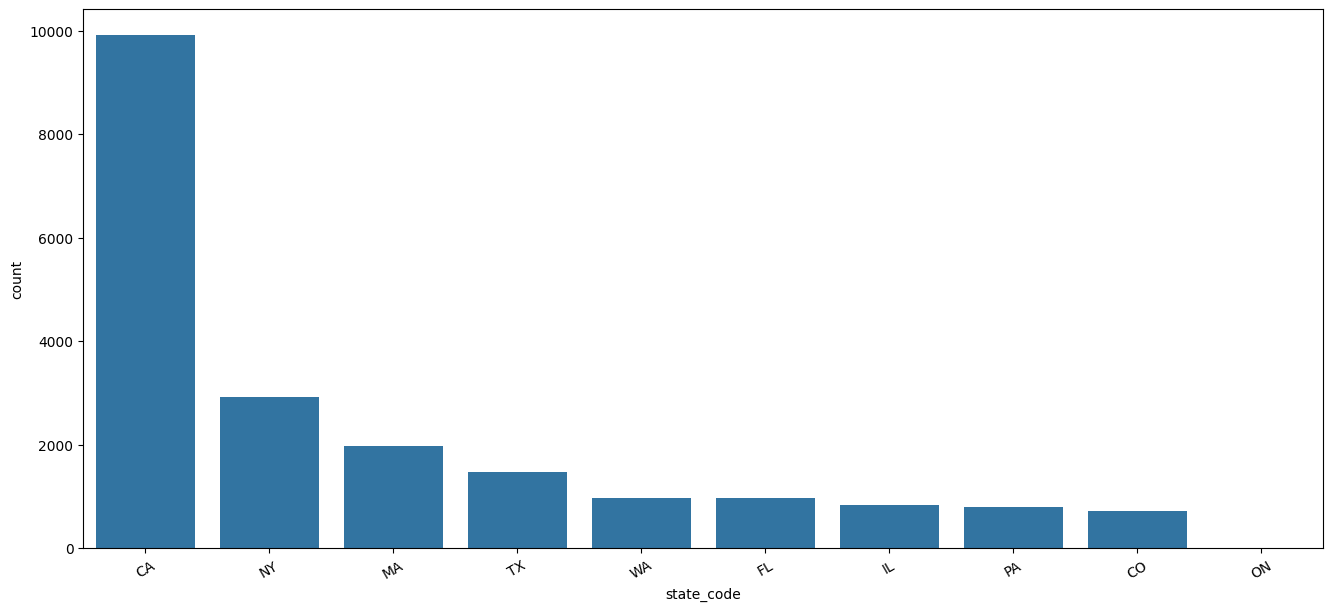

In [169]:
df_USA = df[(df['country_code'] =='USA')]
plt.figure(figsize=(16,7))
g = sns.countplot(x ='state_code', data = df_USA, order=df['state_code'].value_counts().iloc[:10].index)
plt.xticks(rotation=30)
plt.show()

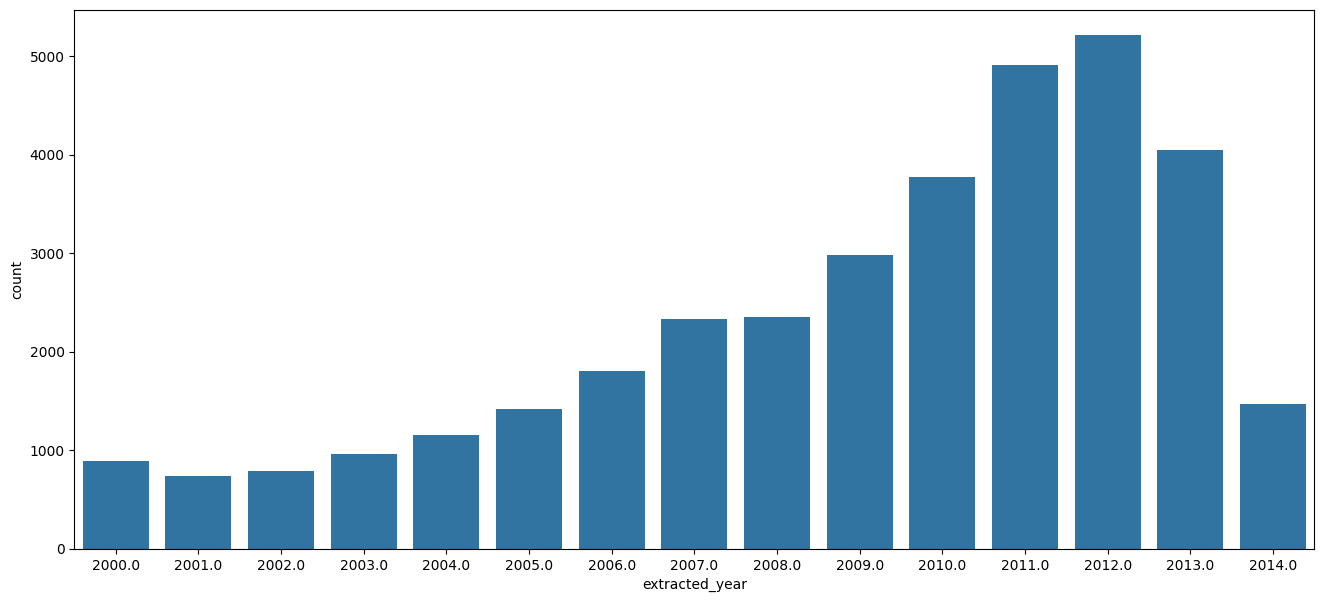

In [170]:
# Extract year from the datetime column and create a new column
df['extracted_year'] = df['founded_year'].dt.year

# Filter the rows based on the extracted year
df_new = df[df['extracted_year'] >= 2000]

plt.figure(figsize=(16,7))
sns.countplot(x='extracted_year', data=df_new)
plt.show()

In [171]:
df['founded_year'].max() #newest year
 #2014 is the newest year

Timestamp('2014-01-01 00:00:00')

In [172]:
df['founded_year'].min() # oldest year
#1902 is the oldest year

Timestamp('1902-01-01 00:00:00')

In [173]:
#unique number of market
df['market'].nunique()

753

In [174]:
#top 5  markets with the most funding
df.groupby('market')['funding_total_usd'].sum().sort_values(ascending = False).head(5)

market
Biotechnology       7.337295e+10
Mobile              4.947011e+10
Software            4.222348e+10
Clean Technology    3.761994e+10
Health Care         2.946608e+10
Name: funding_total_usd, dtype: float64

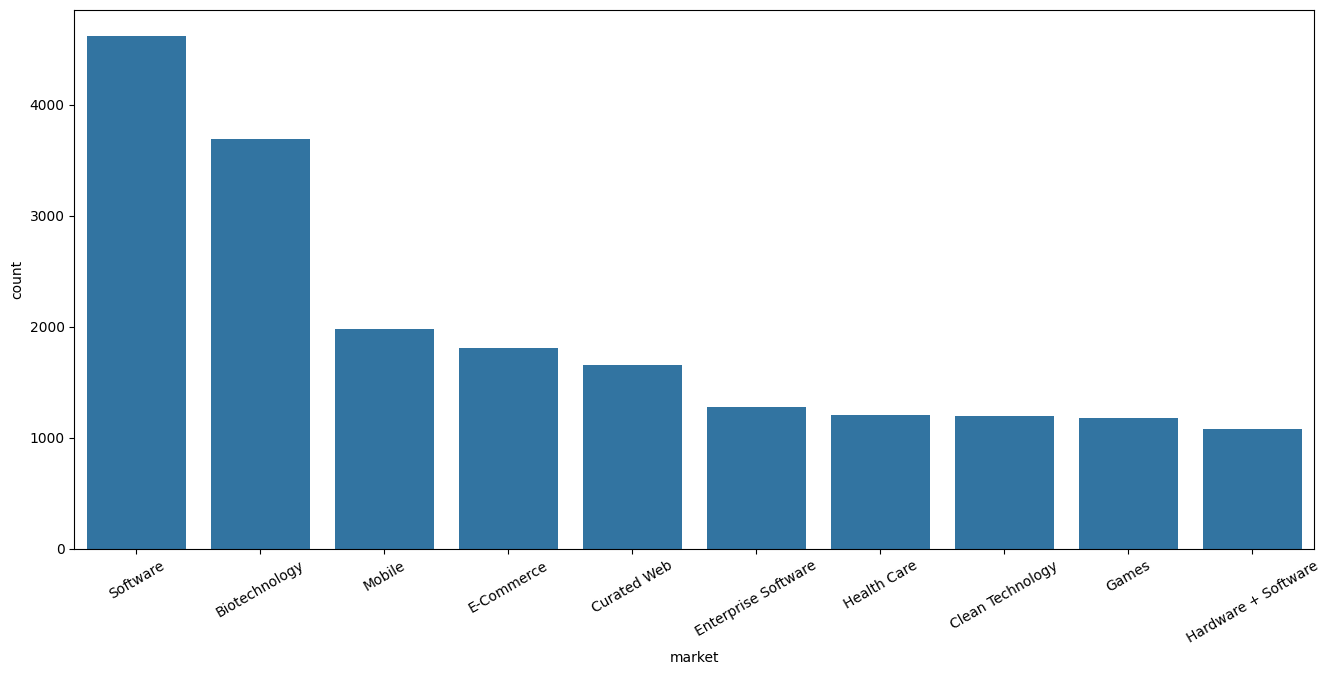

In [175]:
plt.figure(figsize=(16,7))
sns.countplot(x ='market', data = df, order=df['market'].value_counts().iloc[:10].index)
plt.xticks(rotation=30)
plt.show()

In [176]:
#Top five markets in terms of count
df.groupby('market')['name'].count().sort_values(ascending = False).head(5)

market
Software         4620
Biotechnology    3688
Mobile           1983
E-Commerce       1805
Curated Web      1655
Name: name, dtype: int64

In [177]:
#top 5 markets
df.groupby(df['market'])['permalink'].count().sort_values(ascending = False).head(5)

market
Software         4620
Biotechnology    3688
Mobile           1983
E-Commerce       1805
Curated Web      1655
Name: permalink, dtype: int64

In [178]:
df['region'].unique()

array(['New York City', 'Los Angeles', 'Tallinn', ..., 'Jodhpur',
       'Muenchen', 'Buckinghamshire'], dtype=object)

In [179]:
# top 10 regions. There is a lot from main cities like SF, NYC, Boston, London
df.groupby('region')['name'].count().sort_values(ascending = False).head(10)

region
SF Bay Area         6804
New York City       2577
Boston              1837
London              1588
Los Angeles         1389
Seattle              932
Washington, D.C.     785
Chicago              749
San Diego            700
Denver               636
Name: name, dtype: int64

Feature Engineering

We create a new column that for differences in time between the last and first funding date.

A total investment column was also created that included the sum of all the investments

The data contains above 700 different market values. We reduce this number by grouping markets into different industry groups segment on the industry grouping list produced by datarade. The new column Industry Group had 43 industry groups .

The data contains 115 countries. We join a dataset that contains the country name and continent. We introduce a new column -- Continent

We turn numerical values like total investment, difference in funding year, funding rounds, seed, venturew into categories like low and high based on their spread. We then turn the categorical values into numbers for the model to understand.

We turn other columns like equity crowdfunding, undisclosed, convertible note, debt financing, angel, private equity, post ipo equity, secondary market, product crowdfunding, round A -H into 0 and 1 based on if the company was able to raise that type of funding.

In [180]:
# finding the difference in days between first and last funding dates
df['diff_funding'] = df['last_funding_at'] - df['first_funding_at']

In [181]:
 #we check for mean
 df['diff_funding'].describe()

count                          49428
mean     312 days 11:05:24.253459576
std      624 days 19:13:46.845677584
min                  0 days 00:00:00
25%                  0 days 00:00:00
50%                  0 days 00:00:00
75%                382 days 00:00:00
max              17287 days 00:00:00
Name: diff_funding, dtype: object

In [182]:
# turning the difference into months
df['diff_funding_months'] = (df['last_funding_at'] - df['first_funding_at'])

In [183]:
df['diff_funding_months'].describe()

count                          49428
mean     312 days 11:05:24.253459576
std      624 days 19:13:46.845677584
min                  0 days 00:00:00
25%                  0 days 00:00:00
50%                  0 days 00:00:00
75%                382 days 00:00:00
max              17287 days 00:00:00
Name: diff_funding_months, dtype: object

In [184]:
#creating new column for total investment
df['total_investment'] = df['seed'] + df['venture'] + df['equity_crowdfunding'] + df['undisclosed'] + df['convertible_note'] + df['debt_financing'] + df['angel'] + df['grant'] + df['private_equity'] + df['post_ipo_equity'] + df['post_ipo_debt'] + df['secondary_market'] + df['product_crowdfunding']
#calculating the total investment for each company
df['total_investment'].describe()

count    4.943800e+04
mean     1.316667e+07
std      1.535540e+08
min      0.000000e+00
25%      5.000000e+04
50%      1.000000e+06
75%      6.772162e+06
max      3.007950e+10
Name: total_investment, dtype: float64

In [185]:
# sum of total investment
df['total_investment'].sum()

650933703144.0

In [186]:
df['funding_total_usd'].describe()

count    4.943800e+04
mean     1.316667e+07
std      1.535540e+08
min      0.000000e+00
25%      5.000000e+04
50%      1.000000e+06
75%      6.772162e+06
max      3.007950e+10
Name: funding_total_usd, dtype: float64

In [187]:
#confirming that funding total and total investment is the same . We can drop one of the columns
df['funding_total_usd'].sum()

650933703144.0

In [188]:
# calculating how long it took them to get their first funding after being founded
df['diff_first_funding_months'] = (df['first_funding_at'] - df['founded_at'])

In [189]:
#negative values shows that there is a founded date but there is no first funding date.
df['diff_first_funding_months'].describe()

count                           38547
mean     1416 days 09:10:45.248657488
std      3386 days 19:29:35.882888192
min             -17536 days +00:00:00
25%                 152 days 00:00:00
50%                 546 days 00:00:00
75%                1492 days 00:00:00
max               83774 days 00:00:00
Name: diff_first_funding_months, dtype: object

In [190]:
# copying dataframe
df1 = df.copy()

In [191]:
#dropping unecessary columns that we wont use
df1 = df1.drop(columns= ['homepage_url', 'category_list', 'state_code', 'founded_at', 'founded_month', 'founded_quarter', 'founded_year',
                    'diff_first_funding_months', 'diff_funding', 'funding_total_usd', 'city', 'region', 'first_funding_at', 'last_funding_at'])

In [192]:
df1.columns

Index(['permalink', 'name', 'market', 'status', 'country_code',
       'funding_rounds', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'founded_year_group', 'extracted_year', 'diff_funding_months',
       'total_investment'],
      dtype='object')

In [193]:
#dropping null values from these columns
df1 = df1.dropna(subset=['permalink', 'status', 'name', 'market', 'country_code', 'diff_funding_months'])

In [194]:
# checking if there are any null values left
df1.isnull().sum()

permalink                  0
name                       0
market                     0
status                     0
country_code               0
funding_rounds             0
seed                       0
venture                    0
equity_crowdfunding        0
undisclosed                0
convertible_note           0
debt_financing             0
angel                      0
grant                      0
private_equity             0
post_ipo_equity            0
post_ipo_debt              0
secondary_market           0
product_crowdfunding       0
round_A                    0
round_B                    0
round_C                    0
round_D                    0
round_E                    0
round_F                    0
round_G                    0
round_H                    0
founded_year_group         0
extracted_year          7324
diff_funding_months        0
total_investment           0
dtype: int64

In [195]:
df1.shape

(40471, 31)

In [196]:
#making new column that has difference in funding in year
df1['diff_funding_year'] = round(df1['diff_funding_months']/12)

In [197]:
#number of companies with difference in funding years
#There are not that many companies that has more than 13 year difference in funding
df1.groupby(df1['diff_funding_year'])['permalink'].count().sort_values(ascending = False).head(50)

diff_funding_year
0 days 00:00:00     24728
30 days 10:00:00       93
12 days 18:00:00       43
20 days 06:00:00       37
33 days 00:00:00       36
35 days 14:00:00       35
7 days 16:00:00        35
25 days 08:00:00       35
60 days 22:00:00       32
60 days 20:00:00       32
35 days 12:00:00       31
10 days 04:00:00       31
15 days 02:00:00       31
38 days 02:00:00       30
27 days 22:00:00       30
30 days 12:00:00       29
48 days 04:00:00       29
27 days 20:00:00       28
22 days 18:00:00       28
2 days 14:00:00        28
40 days 16:00:00       27
12 days 14:00:00       27
19 days 06:00:00       26
40 days 14:00:00       26
38 days 00:00:00       26
17 days 16:00:00       25
45 days 12:00:00       25
20 days 08:00:00       25
32 days 22:00:00       25
15 days 08:00:00       24
22 days 20:00:00       24
17 days 20:00:00       23
5 days 02:00:00        23
53 days 04:00:00       23
25 days 10:00:00       23
20 days 10:00:00       23
42 days 06:00:00       22
17 days 18:00:00    

In [198]:
# number of unique market values
print(df1['market'].nunique())
# number of unique country codes
print(df1['country_code'].nunique())

736
113


In [199]:
# grouping markets in industries to decrease the number of segments.
admin_services = str('Employer Benefits Programs, Human Resource Automation, Corporate IT, Distribution, Service Providers, Archiving Service, Call Center, Collection Agency, College Recruiting, Courier Service, Debt Collections, Delivery, Document Preparation, Employee Benefits, Extermination Service, Facilities Support Services, Housekeeping Service, Human Resources, Knowledge Management, Office Administration, Packaging Services, Physical Security, Project Management, Staffing Agency, Trade Shows, Virtual Workforce').split(', ')
advertising = str('Creative Industries, Promotional, Advertising Ad Exchange, Ad Network, Ad Retargeting, Ad Server, Ad Targeting, Advertising, Advertising Platforms, Affiliate Marketing, Local Advertising, Mobile Advertising, Outdoor Advertising, SEM, Social Media Advertising, Video Advertising').split(', ')
agriculture = str('Agriculture, AgTech, Animal Feed, Aquaculture, Equestrian, Farming, Forestry, Horticulture, Hydroponics, Livestock').split(', ')
app = str('Application Performance Monitoring, App Stores, Application Platforms, Enterprise Application, App Discovery, Apps, Consumer Applications, Enterprise Applications, Mobile Apps, Reading Apps, Web Apps').split(', ')
artificial_intelli = str('Artificial Intelligence, Intelligent Systems, Machine Learning, Natural Language Processing, Predictive Analytics').split(', ')
biotechnology = str('Synthetic Biology, Bio-Pharm, Bioinformatics, Biometrics, Biopharma, Biotechnology, Genetics, Life Science, Neuroscience, Quantified Self').split(', ')
clothing = str('Fashion, Laundry and Dry-cleaning, Lingerie, Shoes').split(', ')
shopping = str('Consumer Behavior, Customer Support Tools, Discounts, Reviews and Recommendations, Auctions, Classifieds, Collectibles, Consumer Reviews, Coupons, E-Commerce, E-Commerce Platforms, Flash Sale, Gift, Gift Card, Gift Exchange, Gift Registry, Group Buying, Local Shopping, Made to Order, Marketplace, Online Auctions, Personalization, Point of Sale, Price Comparison, Rental, Retail, Retail Technology, Shopping, Shopping Mall, Social Shopping, Sporting Goods, Vending and Concessions, Virtual Goods, Wholesale').split(', ')
community = str("Self Development, Sex, Forums, Match-Making, Babies, Identity, Women, Kids, Entrepreneur, Networking, Adult, Baby, Cannabis, Children, Communities, Dating, Elderly, Family, Funerals, Humanitarian, Leisure, LGBT, Lifestyle, Men's, Online Forums, Parenting, Pet, Private Social Networking, Professional Networking, Q&A, Religion, Retirement, Sex Industry, Sex Tech, Social, Social Entrepreneurship, Teenagers, Virtual World, Wedding, Women's, Young Adults").split(', ')
electronics  = str('Mac, iPod Touch, Tablets, iPad, iPhone, Computer, Consumer Electronics, Drones, Electronics, Google Glass, Mobile Devices, Nintendo, Playstation, Roku, Smart Home, Wearables, Windows Phone, Xbox').split(', ')
consumer_goods= str('Commodities, Sunglasses, Groceries, Batteries, Cars, Beauty, Comics, Consumer Goods, Cosmetics, DIY, Drones, Eyewear, Fast-Moving Consumer Goods, Flowers, Furniture, Green Consumer Goods, Handmade, Jewelry, Lingerie, Shoes, Tobacco, Toys').split(', ')
content = str('E-Books, MicroBlogging, Opinions, Blogging Platforms, Content Delivery Network, Content Discovery, Content Syndication, Creative Agency, DRM, EBooks, Journalism, News, Photo Editing, Photo Sharing, Photography, Printing, Publishing, Social Bookmarking, Video Editing, Video Streaming').split(', ')
data = str('Optimization, A/B Testing, Analytics, Application Performance Management, Artificial Intelligence, Big Data, Bioinformatics, Biometrics, Business Intelligence, Consumer Research, Data Integration, Data Mining, Data Visualization, Database, Facial Recognition, Geospatial, Image Recognition, Intelligent Systems, Location Based Services, Machine Learning, Market Research, Natural Language Processing, Predictive Analytics, Product Research, Quantified Self, Speech Recognition, Test and Measurement, Text Analytics, Usability Testing').split(', ')
design = str('Visualization, Graphics, Design, Designers, CAD, Consumer Research, Data Visualization, Fashion, Graphic Design, Human Computer Interaction, Industrial Design, Interior Design, Market Research, Mechanical Design, Product Design, Product Research, Usability Testing, UX Design, Web Design').split(', ')
education = str('Universities, College Campuses, University Students, High Schools, All Students, Colleges, Alumni, Charter Schools, College Recruiting, Continuing Education, Corporate Training, E-Learning, EdTech, Education, Edutainment, Higher Education, Language Learning, MOOC, Music Education, Personal Development, Primary Education, Secondary Education, Skill Assessment, STEM Education, Textbook, Training, Tutoring, Vocational Education').split(', ')
energy = str('Gas, Natural Gas Uses, Oil, Oil & Gas, Battery, Biofuel, Biomass Energy, Clean Energy, Electrical Distribution, Energy, Energy Efficiency, Energy Management, Energy Storage, Fossil Fuels, Fuel, Fuel Cell, Oil and Gas, Power Grid, Renewable Energy, Solar, Wind Energy').split(', ')
events = str('Concerts, Event Management, Event Promotion, Events, Nightclubs, Nightlife, Reservations, Ticketing, Wedding').split(', ')
financial = str('Debt Collecting, P2P Money Transfer, Investment Management, Trading, Accounting, Angel Investment, Asset Management, Auto Insurance, Banking, Bitcoin, Commercial Insurance, Commercial Lending, Consumer Lending, Credit, Credit Bureau, Credit Cards, Crowdfunding, Cryptocurrency, Debit Cards, Debt Collections, Finance, Financial Exchanges, Financial Services, FinTech, Fraud Detection, Funding Platform, Gift Card, Health Insurance, Hedge Funds, Impact Investing, Incubators, Insurance, InsurTech, Leasing, Lending, Life Insurance, Micro Lending, Mobile Payments, Payments, Personal Finance, Prediction Markets, Property Insurance, Real Estate Investment, Stock Exchanges, Trading Platform, Transaction Processing, Venture Capital, Virtual Currency, Wealth Management').split(', ')
food = str('Specialty Foods, Bakery, Brewing, Cannabis, Catering, Coffee, Confectionery, Cooking, Craft Beer, Dietary Supplements, Distillery, Farmers Market, Food and Beverage, Food Delivery, Food Processing, Food Trucks, Fruit, Grocery, Nutrition, Organic Food, Recipes, Restaurants, Seafood, Snack Food, Tea, Tobacco, Wine And Spirits, Winery').split(', ')
gaming = str('Game, Games, Casual Games, Console Games, Contests, Fantasy Sports, Gambling, Gamification, Gaming, MMO Games, Online Games, PC Games, Serious Games, Video Games').split(', ')
government = str('Polling, Governance, CivicTech, Government, GovTech, Law Enforcement, Military, National Security, Politics, Public Safety, Social Assistance').split(', ')
hardware= str('Cable, 3D, 3D Technology, Application Specific Integrated Circuit (ASIC), Augmented Reality, Cloud Infrastructure, Communication Hardware, Communications Infrastructure, Computer, Computer Vision, Consumer Electronics, Data Center, Data Center Automation, Data Storage, Drone Management, Drones, DSP, Electronic Design Automation (EDA), Electronics, Embedded Systems, Field-Programmable Gate Array (FPGA), Flash Storage, Google Glass, GPS, GPU, Hardware, Industrial Design, Laser, Lighting, Mechanical Design, Mobile Devices, Network Hardware, NFC, Nintendo, Optical Communication, Playstation, Private Cloud, Retail Technology, RFID, RISC, Robotics, Roku, Satellite Communication, Semiconductor, Sensor, Sex Tech, Telecommunications, Video Conferencing, Virtual Reality, Virtualization, Wearables, Windows Phone, Wireless, Xbox').split(', ')
health_care = str('Senior Health, Physicians, Electronic Health Records, Doctors, Healthcare Services, Diagnostics, Alternative Medicine, Assisted Living, Assistive Technology, Biopharma, Cannabis, Child Care, Clinical Trials, Cosmetic Surgery, Dental, Diabetes, Dietary Supplements, Elder Care, Electronic Health Record (EHR), Emergency Medicine, Employee Benefits, Fertility, First Aid, Funerals, Genetics, Health Care, Health Diagnostics, Home Health Care, Hospital, Medical, Medical Device, mHealth, Nursing and Residential Care, Nutraceutical, Nutrition, Outpatient Care, Personal Health, Pharmaceutical, Psychology, Rehabilitation, Therapeutics, Veterinary, Wellness').split(', ')
it = str('Distributors, Algorithms, ICT, M2M, Technology, Business Information Systems, CivicTech, Cloud Data Services, Cloud Management, Cloud Security, CMS, Contact Management, CRM, Cyber Security, Data Center, Data Center Automation, Data Integration, Data Mining, Data Visualization, Document Management, E-Signature, Email, GovTech, Identity Management, Information and Communications Technology (ICT), Information Services, Information Technology, Intrusion Detection, IT Infrastructure, IT Management, Management Information Systems, Messaging, Military, Network Security, Penetration Testing, Private Cloud, Reputation, Sales Automation, Scheduling, Social CRM, Spam Filtering, Technical Support, Unified Communications, Video Chat, Video Conferencing, Virtualization, VoIP').split(', ')
internet = str('Online Identity, Cyber, Portals, Web Presence Management, Domains, Tracking, Web Tools, Curated Web, Search, Cloud Computing, Cloud Data Services, Cloud Infrastructure, Cloud Management, Cloud Storage, Darknet, Domain Registrar, E-Commerce Platforms, Ediscovery, Email, Internet, Internet of Things, ISP, Location Based Services, Messaging, Music Streaming, Online Forums, Online Portals, Private Cloud, Product Search, Search Engine, SEM, Semantic Search, Semantic Web, SEO, SMS, Social Media, Social Media Management, Social Network, Unified Communications, Vertical Search, Video Chat, Video Conferencing, Visual Search, VoIP, Web Browsers, Web Hosting').split(', ')
invest = str('Angel Investment, Banking, Commercial Lending, Consumer Lending, Credit, Credit Cards, Financial Exchanges, Funding Platform, Hedge Funds, Impact Investing, Incubators, Micro Lending, Stock Exchanges, Trading Platform, Venture Capital').split(', ')
manufacturing = str('Innovation Engineering, Civil Engineers, Heavy Industry, Engineering Firms, Systems, 3D Printing, Advanced Materials, Foundries, Industrial, Industrial Automation, Industrial Engineering, Industrial Manufacturing, Machinery Manufacturing, Manufacturing, Paper Manufacturing, Plastics and Rubber Manufacturing, Textiles, Wood Processing').split(', ')
media = str('Writers, Creative, Television, Entertainment, Media, Advice, Animation, Art, Audio, Audiobooks, Blogging Platforms, Broadcasting, Celebrity, Concerts, Content, Content Creators, Content Discovery, Content Syndication, Creative Agency, Digital Entertainment, Digital Media, DRM, EBooks, Edutainment, Event Management, Event Promotion, Events, Film, Film Distribution, Film Production, Guides, In-Flight Entertainment, Independent Music, Internet Radio, Journalism, Media and Entertainment, Motion Capture, Music, Music Education, Music Label, Music Streaming, Music Venues, Musical Instruments, News, Nightclubs, Nightlife, Performing Arts, Photo Editing, Photo Sharing, Photography, Podcast, Printing, Publishing, Reservations, Social Media, Social News, Theatre, Ticketing, TV, TV Production, Video, Video Editing, Video on Demand, Video Streaming, Virtual World').split(', ')
message = str('Unifed Communications, Chat, Email, Meeting Software, Messaging, SMS, Unified Communications, Video Chat, Video Conferencing, VoIP, Wired Telecommunications').split(', ')
mobile = str('Android, Google Glass, iOS, mHealth, Mobile, Mobile Apps, Mobile Devices, Mobile Payments, Windows Phone, Wireless').split(', ')
music = str('Audio, Audiobooks, Independent Music, Internet Radio, Music, Music Education, Music Label, Music Streaming, Musical Instruments, Podcast').split(', ')
resource = str('Biofuel, Biomass Energy, Fossil Fuels, Mineral, Mining, Mining Technology, Natural Resources, Oil and Gas, Precious Metals, Solar, Timber, Water, Wind Energy').split(', ')
navigation = str('Maps, Geospatial, GPS, Indoor Positioning, Location Based Services, Mapping Services, Navigation').split(', ')
other = str('Mass Customization, Monetization, Testing, Subscription Businesses, Mobility, Incentives, Peer-to-Peer, Nonprofits, Alumni, Association, B2B, B2C, Blockchain, Charity, Collaboration, Collaborative Consumption, Commercial, Consumer, Crowdsourcing, Customer Service, Desktop Apps, Emerging Markets, Enterprise, Ethereum, Franchise, Freemium, Generation Y, Generation Z, Homeless Shelter, Infrastructure, Knowledge Management, LGBT Millennials, Non Profit, Peer to Peer, Professional Services, Project Management, Real Time, Retirement, Service Industry, Sharing Economy, Small and Medium Businesses, Social Bookmarking, Social Impact, Subscription Service, Technical Support, Underserved Children, Universities').split(', ')
payment = str('Billing, Bitcoin, Credit Cards, Cryptocurrency, Debit Cards, Fraud Detection, Mobile Payments, Payments, Transaction Processing, Virtual Currency').split(', ')
platforms = str('Development Platforms, Android, Facebook, Google, Google Glass, iOS, Linux, macOS, Nintendo, Operating Systems, Playstation, Roku, Tizen, Twitter, WebOS, Windows, Windows Phone, Xbox').split(', ')
privacy = str('Digital Rights Management, Personal Data, Cloud Security, Corrections Facilities, Cyber Security, DRM, E-Signature, Fraud Detection, Homeland Security, Identity Management, Intrusion Detection, Law Enforcement, Network Security, Penetration Testing, Physical Security, Privacy, Security').split(', ')
services = str('Funeral Industry, English-Speaking, Spas, Plumbers, Service Industries, Staffing Firms, Translation, Career Management, Business Services, Services, Accounting, Business Development, Career Planning, Compliance, Consulting, Customer Service, Employment, Environmental Consulting, Field Support, Freelance, Intellectual Property, Innovation Management, Legal, Legal Tech, Management Consulting, Outsourcing, Professional Networking, Quality Assurance, Recruiting, Risk Management, Social Recruiting, Translation Service').split(', ')
realestate= str('Office Space, Self Storage, Brokers, Storage, Home Owners, Self Storage , Realtors, Home & Garden, Utilities, Home Automation, Architecture, Building Maintenance, Building Material, Commercial Real Estate, Construction, Coworking, Facility Management, Fast-Moving Consumer Goods, Green Building, Home and Garden, Home Decor, Home Improvement, Home Renovation, Home Services, Interior Design, Janitorial Service, Landscaping, Property Development, Property Management, Real Estate, Real Estate Investment, Rental Property, Residential, Self-Storage, Smart Building, Smart Cities, Smart Home, Timeshare, Vacation Rental').split(', ')
sales = str('Advertising, Affiliate Marketing, App Discovery, App Marketing, Brand Marketing, Cause Marketing, Content Marketing, CRM, Digital Marketing, Digital Signage, Direct Marketing, Direct Sales, Email Marketing, Lead Generation, Lead Management, Local, Local Advertising, Local Business, Loyalty Programs, Marketing, Marketing Automation, Mobile Advertising, Multi-level Marketing, Outdoor Advertising, Personal Branding, Public Relations, Sales, Sales Automation, SEM, SEO, Social CRM, Social Media Advertising, Social Media Management, Social Media Marketing, Sponsorship, Video Advertising').split(', ')
science = str('Face Recognition, New Technologies, Advanced Materials, Aerospace, Artificial Intelligence, Bioinformatics, Biometrics, Biopharma, Biotechnology, Chemical, Chemical Engineering, Civil Engineering, Embedded Systems, Environmental Engineering, Human Computer Interaction, Industrial Automation, Industrial Engineering, Intelligent Systems, Laser, Life Science, Marine Technology, Mechanical Engineering, Nanotechnology, Neuroscience, Nuclear, Quantum Computing, Robotics, Semiconductor, Software Engineering, STEM Education').split(', ')
software = str('Business Productivity, 3D Technology, Android, App Discovery, Application Performance Management, Apps, Artificial Intelligence, Augmented Reality, Billing, Bitcoin, Browser Extensions, CAD, Cloud Computing, Cloud Management, CMS, Computer Vision, Consumer Applications, Consumer Software, Contact Management, CRM, Cryptocurrency, Data Center Automation, Data Integration, Data Storage, Data Visualization, Database, Developer APIs, Developer Platform, Developer Tools, Document Management, Drone Management, E-Learning, EdTech, Electronic Design Automation (EDA), Embedded Software, Embedded Systems, Enterprise Applications, Enterprise Resource Planning (ERP), Enterprise Software, Facial Recognition, File Sharing, IaaS, Image Recognition, iOS, Linux, Machine Learning, macOS, Marketing Automation, Meeting Software, Mobile Apps, Mobile Payments, MOOC, Natural Language Processing, Open Source, Operating Systems, PaaS, Predictive Analytics, Presentation Software, Presentations, Private Cloud, Productivity Tools, QR Codes, Reading Apps, Retail Technology, Robotics, SaaS, Sales Automation, Scheduling, Sex Tech, Simulation, SNS, Social CRM, Software, Software Engineering, Speech Recognition, Task Management, Text Analytics, Transaction Processing, Video Conferencing, Virtual Assistant, Virtual Currency, Virtual Desktop, Virtual Goods, Virtual Reality, Virtual World, Virtualization, Web Apps, Web Browsers, Web Development').split(', ')
sports = str('American Football, Baseball, Basketball, Boating, Cricket, Cycling, Diving, eSports, Fantasy Sports, Fitness, Golf, Hockey, Hunting, Outdoors, Racing, Recreation, Rugby, Sailing, Skiing, Soccer, Sporting Goods, Sports, Surfing, Swimming, Table Tennis, Tennis, Ultimate Frisbee, Volley Ball').split(', ')
sustainability = str('Green, Wind, Biomass Power Generation, Renewable Tech, Environmental Innovation, Renewable Energies, Clean Technology, Biofuel, Biomass Energy, Clean Energy, CleanTech, Energy Efficiency, Environmental Engineering, Green Building, Green Consumer Goods, GreenTech, Natural Resources, Organic, Pollution Control, Recycling, Renewable Energy, Solar, Sustainability, Waste Management, Water Purification, Wind Energy').split(', ')
transportation = str('Taxis, Air Transportation, Automotive, Autonomous Vehicles, Car Sharing, Courier Service, Delivery Service, Electric Vehicle, Ferry Service, Fleet Management, Food Delivery, Freight Service, Last Mile Transportation, Limousine Service, Logistics, Marine Transportation, Parking, Ports and Harbors, Procurement, Public Transportation, Railroad, Recreational Vehicles, Ride Sharing, Same Day Delivery, Shipping, Shipping Broker, Space Travel, Supply Chain Management, Taxi Service, Transportation, Warehousing, Water Transportation').split(', ')
travel = str('Adventure Travel, Amusement Park and Arcade, Business Travel, Casino, Hospitality, Hotel, Museums and Historical Sites, Parks, Resorts, Timeshare, Tour Operator, Tourism, Travel, Travel Accommodations, Travel Agency, Vacation Rental').split(', ')
video = str('Animation, Broadcasting, Film, Film Distribution, Film Production, Motion Capture, TV, TV Production, Video, Video Editing, Video on Demand, Video Streaming').split(', ')

In [200]:
import pandas as np

In [201]:
import numpy as np

# Making a new column called Industry group
df1['Industry_Group'] = np.where(df1.market.str.contains('|'.join(admin_services), flags=re.IGNORECASE), "Administrative Services",
                                np.where(df1.market.str.contains('|'.join(software), flags=re.IGNORECASE), "Software",
                                np.where(df1.market.str.contains('|'.join(advertising), flags=re.IGNORECASE), "Advertising",
                                np.where(df1.market.str.contains('|'.join(agriculture), flags=re.IGNORECASE), "Agriculture and Farming",
                                np.where(df1.market.str.contains('|'.join(app), flags=re.IGNORECASE), "Apps",
                                np.where(df1.market.str.contains('|'.join(artificial_intelli), flags=re.IGNORECASE), "Artificial Intelligence",
                                np.where(df1.market.str.contains('|'.join(biotechnology), flags=re.IGNORECASE), "Biotechnology",
                                np.where(df1.market.str.contains('|'.join(clothing), flags=re.IGNORECASE), "Clothing and Apparel",
                                np.where(df1.market.str.contains('|'.join(shopping), flags=re.IGNORECASE), "Commerce and Shopping",
                                np.where(df1.market.str.contains('|'.join(community), flags=re.IGNORECASE), "Community and Lifestyle",
                                np.where(df1.market.str.contains('|'.join(electronics), flags=re.IGNORECASE), "Consumer Electronics",
                                np.where(df1.market.str.contains('|'.join(consumer_goods), flags=re.IGNORECASE), "Consumer Goods",
                                np.where(df1.market.str.contains('|'.join(content), flags=re.IGNORECASE), "Content and Publishing",
                                np.where(df1.market.str.contains('|'.join(data), flags=re.IGNORECASE), "Data and Analytics",
                                np.where(df1.market.str.contains('|'.join(design), flags=re.IGNORECASE), "Design",
                                np.where(df1.market.str.contains('|'.join(education), flags=re.IGNORECASE), "Education",
                                np.where(df1.market.str.contains('|'.join(energy), flags=re.IGNORECASE), "Energy",
                                np.where(df1.market.str.contains('|'.join(events), flags=re.IGNORECASE), "Events",
                                np.where(df1.market.str.contains('|'.join(financial), flags=re.IGNORECASE), "Financial Services",
                                np.where(df1.market.str.contains('|'.join(food), flags=re.IGNORECASE), "Food and Beverage",
                                np.where(df1.market.str.contains('|'.join(gaming), flags=re.IGNORECASE), "Gaming",
                                np.where(df1.market.str.contains('|'.join(government), flags=re.IGNORECASE), "Government and Military",
                                np.where(df1.market.str.contains('|'.join(hardware), flags=re.IGNORECASE), "Hardware",
                                np.where(df1.market.str.contains('|'.join(health_care), flags=re.IGNORECASE), "Health Care",
                                np.where(df1.market.str.contains('|'.join(it), flags=re.IGNORECASE), "Information Technology",
                                np.where(df1.market.str.contains('|'.join(internet), flags=re.IGNORECASE), "Internet Services",
                                np.where(df1.market.str.contains('|'.join(invest), flags=re.IGNORECASE), "Lending and Investments",
                                np.where(df1.market.str.contains('|'.join(manufacturing), flags=re.IGNORECASE), "Manufacturing",
                                np.where(df1.market.str.contains('|'.join(media), flags=re.IGNORECASE), "Media and Entertainment",
                                np.where(df1.market.str.contains('|'.join(message), flags=re.IGNORECASE), "Messaging and Telecommunication",
                                np.where(df1.market.str.contains('|'.join(mobile), flags=re.IGNORECASE), "Mobile",
                                np.where(df1.market.str.contains('|'.join(music), flags=re.IGNORECASE), "Music and Audio",
                                np.where(df1.market.str.contains('|'.join(resource), flags=re.IGNORECASE), "Natural Resources",
                                np.where(df1.market.str.contains('|'.join(navigation), flags=re.IGNORECASE), "Navigation and Mapping",
                                np.where(df1.market.str.contains('|'.join(payment), flags=re.IGNORECASE), "Payments",
                                np.where(df1.market.str.contains('|'.join(platforms), flags=re.IGNORECASE), "Platforms",
                                np.where(df1.market.str.contains('|'.join(privacy), flags=re.IGNORECASE), "Privacy and Security",
                                np.where(df1.market.str.contains('|'.join(services), flags=re.IGNORECASE), "Professional Services",
                                np.where(df1.market.str.contains('|'.join(realestate), flags=re.IGNORECASE), "Real Estate",
                                np.where(df1.market.str.contains('|'.join(sales), flags=re.IGNORECASE), "Sales and Marketing",
                                np.where(df1.market.str.contains('|'.join(science), flags=re.IGNORECASE), "Science and Engineering",
                                np.where(df1.market.str.contains('|'.join(sports), flags=re.IGNORECASE), "Sports",
                                np.where(df1.market.str.contains('|'.join(sustainability), flags=re.IGNORECASE), "Sustainability",
                                np.where(df1.market.str.contains('|'.join(transportation), flags=re.IGNORECASE), "Transportation",
                                np.where(df1.market.str.contains('|'.join(travel), flags=re.IGNORECASE), "Travel and Tourism",
                                np.where(df1.market.str.contains('|'.join(video), flags=re.IGNORECASE), "Video",
                                np.where(df1.market.str.contains('|'.join(other), flags=re.IGNORECASE), "Other",  "Other")))))))))))))))))))))))))))))))))))))))))))))))



C:\Users\hp\AppData\Local\Temp\ipykernel_324\1263690752.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  np.where(df1.market.str.contains('|'.join(software), flags=re.IGNORECASE), "Software",


C:\Users\hp\AppData\Local\Temp\ipykernel_324\1263690752.py:26: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  np.where(df1.market.str.contains('|'.join(hardware), flags=re.IGNORECASE), "Hardware",
C:\Users\hp\AppData\Local\Temp\ipykernel_324\1263690752.py:27: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  np.where(df1.market.str.contains('|'.join(health_care), flags=re.IGNORECASE), "Health Care",
C:\Users\hp\AppData\Local\Temp\ipykernel_324\1263690752.py:28: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  np.where(df1.market.str.contains('|'.join(it), flags=re.IGNORECASE), "Information Technology",


In [202]:
#Industry groups unique values
df1['Industry_Group'].unique()

array(['Content and Publishing', 'Gaming', 'Consumer Electronics',
       'Travel and Tourism', 'Advertising', 'Software',
       'Commerce and Shopping', 'Health Care', 'Real Estate', 'Education',
       'Internet Services', 'Food and Beverage',
       'Media and Entertainment', 'Data and Analytics',
       'Clothing and Apparel', 'Other', 'Biotechnology',
       'Community and Lifestyle', 'Sports', 'Mobile', 'Manufacturing',
       'Design', 'Financial Services', 'Messaging and Telecommunication',
       'Information Technology', 'Professional Services',
       'Administrative Services', 'Navigation and Mapping',
       'Transportation', 'Hardware', 'Privacy and Security',
       'Sales and Marketing', 'Natural Resources', 'Consumer Goods',
       'Events', 'Energy', 'Platforms', 'Apps', 'Science and Engineering',
       'Government and Military', 'Agriculture and Farming',
       'Sustainability', 'Artificial Intelligence'], dtype=object)

In [203]:
# histogram of total investment
#df1['total_investment'].hist(bins = 100)
#remember to return when corrected

In [204]:
#loading the dataset
country = pd.read_csv('https://raw.githubusercontent.com/mercy98/STRINGS/master/continents2.csv' , encoding='ISO-8859-1')
country.head()


,ï»¿name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Ã land Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [205]:
country = pd.read_csv("https://raw.githubusercontent.com/mercy98/STRINGS/master/continents2.csv", encoding='ISO-8859-1')
country = country[['region', 'alpha-3', 'ï»¿name']]
country = country.dropna(how='any',axis=0)
# checking if there is null values
country.isnull().sum()

region     0
alpha-3    0
ï»¿name    0
dtype: int64

In [206]:
# Rename columns
country = country.rename(columns={
    "region": "Continent_Name",
    "alpha-3": "Three_Letter_Country_Code",
    "ï»¿name": "Country_Name"
})

In [207]:
country.head()

,Continent_Name,Three_Letter_Country_Code,Country_Name
0,Asia,AFG,Afghanistan
1,Europe,ALA,Ã land Islands
2,Europe,ALB,Albania
3,Africa,DZA,Algeria
4,Oceania,ASM,American Samoa


In [208]:
# merging both datasets and creating new column called continent
df1 = df1.merge(country, left_on='country_code', right_on='Three_Letter_Country_Code')
df1.columns

Index(['permalink', 'name', 'market', 'status', 'country_code',
       'funding_rounds', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'founded_year_group', 'extracted_year', 'diff_funding_months',
       'total_investment', 'diff_funding_year', 'Industry_Group',
       'Continent_Name', 'Three_Letter_Country_Code', 'Country_Name'],
      dtype='object')

In [209]:
#number of companies in each continent
# North America is the highest
df1.groupby(by = ['Continent_Name'])['permalink'].count()

Continent_Name
Africa        175
Americas    28576
Asia         3964
Europe       7400
Oceania       334
Name: permalink, dtype: int64

In [210]:
#shape of dataframe
df1.shape

(40449, 36)

In [211]:
# total number of zeros in each column
# there is still a lot of zeros
df1.isin([0]).sum()

permalink                        0
name                             0
market                           0
status                           0
country_code                     0
funding_rounds                   0
seed                         29361
venture                      19744
equity_crowdfunding          39998
undisclosed                  39730
convertible_note             39957
debt_financing               36633
angel                        37775
grant                        39533
private_equity               39236
post_ipo_equity              40214
post_ipo_debt                40390
secondary_market             40433
product_crowdfunding         40275
round_A                      32279
round_B                      35345
round_C                      37744
round_D                      39204
round_E                      39950
round_F                      40281
round_G                      40417
round_H                      40445
founded_year_group               0
extracted_year      

In [212]:
# copying the df1
df2 = df1.copy()

In [213]:
 # dropping unnecessary columns
df2 = df2.drop(['Three_Letter_Country_Code', 'Country_Name', 'diff_funding_months', 'country_code', 'market'], axis=1)

In [214]:
df2[['funding_rounds', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'diff_funding_year', 'total_investment']].describe().T

,count,mean,std,min,25%,50%,75%,max
funding_rounds,40449.0,1.792702,1.369873,1.0,1.0,1.0,2.0,18.0
seed,40449.0,235655.79065,1139188.856411,0.0,0.0,0.0,25000.0,130000000.0
venture,40449.0,8570420.224184,30837601.702308,0.0,0.0,100000.0,6000000.0,2351000000.0
equity_crowdfunding,40449.0,5912.520532,170654.574483,0.0,0.0,0.0,0.0,17000000.0
undisclosed,40449.0,113494.811516,2588395.415461,0.0,0.0,0.0,0.0,259417808.0
convertible_note,40449.0,27230.913916,1581994.782005,0.0,0.0,0.0,0.0,300000000.0
debt_financing,40449.0,2097525.405993,151888055.474426,0.0,0.0,0.0,0.0,30079503000.0
angel,40449.0,68327.372865,576937.961112,0.0,0.0,0.0,0.0,40000000.0
grant,40449.0,178208.870405,6103883.745793,0.0,0.0,0.0,0.0,750500000.0
private_equity,40449.0,2285014.095824,34015873.021099,0.0,0.0,0.0,0.0,3500000000.0


Here we turn numerical values like total investment, difference in funding year, into categories like low and high based on their spread in number. We then turn the categorical values turned into numbers.

In [215]:
#creating categories of these numerical values based on the output from the describe data. Also creating new column for the categories
cat_invest = pd.cut(df2.total_investment, bins = [-1, 112500, 1400300, 8205200, 40079503000], labels=['low','low_medium','high_medium','high'])
#labeling total investment values as low, low medium, high medium and high based on their descriptive summary.
df2.insert(0,'cat_total_investment',cat_invest) # creating new column called cat_total_investment

In [216]:
cat_diff_funding_year = pd.cut(df2.diff_funding_year, bins = [-1, 2, 49], labels=['low','high'])
#labeling diff_funding_year as low and high based on their descriptive summary.
df2.insert(0,'cat_diff_funding_year',cat_diff_funding_year)# creating new column called cat_diff_funding_year

In [217]:
cat_funding_rounds = pd.cut(df2.funding_rounds, bins = [-1, 2, 20], labels=['low','high'])
#labeling funding_rounds as low and high based on their descriptive summary.
df2.insert(0,'cat_funding_rounds',cat_funding_rounds)# creating new column called cat_funding_rounds

In [218]:
cat_seed = pd.cut(df2.seed, bins = [-1, 28000, 140000000], labels=['low','high'])
#labeling seed as low and high  based on their descriptive summary.
df2.insert(0,'cat_seed',cat_seed)# creating new column called cat_seed

In [219]:
cat_venture = pd.cut(df2.venture, bins = [-1, 85038.5, 6000000, 2451000000], labels=['low','medium','high'])
#labeling venture as low, medium and high based on their descriptive summary.
df2.insert(0,'cat_venture',cat_venture) # creating new column called cat_venture

In [220]:
# fixing the categorical columns  into numerical values so that we can use it on the model
df2['cat_status'] = df2['status'].replace(['closed', 'operating', 'acquired'], [0, 1, 2])
df2['cat_total_investment'] = df2['cat_total_investment'].replace(['low','low_medium','high_medium','high'], [0, 1, 2, 3])
df2['cat_diff_funding_year'] = df2['cat_diff_funding_year'].replace(['low', 'high'], [0, 1])
df2['cat_funding_rounds'] = df2['cat_funding_rounds'].replace(['low', 'high'], [0, 1])
df2['cat_seed'] = df2['cat_seed'].replace(['low', 'high'], [0, 1])
df2['cat_venture'] = df2['cat_venture'].replace(['low','medium','high'], [0, 1, 3])

C:\Users\hp\AppData\Local\Temp\ipykernel_324\1724318791.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['cat_status'] = df2['status'].replace(['closed', 'operating', 'acquired'], [0, 1, 2])
C:\Users\hp\AppData\Local\Temp\ipykernel_324\1724318791.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['cat_total_investment'] = df2['cat_total_investment'].replace(['low','low_medium','high_medium','high'], [0, 1, 2, 3])
C:\Users\hp\AppData\Local\Temp\ipykernel_324\1724318791.py:3: FutureWarning: The behavior of Series.replace

In [221]:
#as a lot of the money columns have 0, we are turning them into new categories of 0 and 1
df2.loc[df2['equity_crowdfunding'] < 1, 'cat_equity_crowdfunding'] = 0
df2.loc[df2['equity_crowdfunding'] > 1, 'cat_equity_crowdfunding'] = 1


df2.loc[df2['undisclosed'] < 1, 'cat_undisclosed'] = 0
df2.loc[df2['undisclosed'] > 1, 'cat_undisclosed'] = 1


df2.loc[df2['convertible_note'] < 1, 'cat_convertible_note'] = 0
df2.loc[df2['convertible_note'] > 1, 'cat_convertible_note'] = 1

df2.loc[df2['debt_financing'] < 1, 'cat_debt_financing'] = 0
df2.loc[df2['debt_financing'] > 1, 'cat_debt_financing'] = 1

df2.loc[df2['angel'] < 1, 'cat_angel'] = 0
df2.loc[df2['angel'] > 1, 'cat_angel'] = 1

df2.loc[df2['grant'] < 1, 'cat_grant'] = 0
df2.loc[df2['grant'] > 1, 'cat_grant'] = 1


df2.loc[df2['private_equity'] < 1, 'cat_private_equity'] = 0
df2.loc[df2['private_equity'] > 1, 'cat_private_equity'] = 1

df2.loc[df2['post_ipo_equity'] < 1, 'cat_post_ipo_equity'] = 0
df2.loc[df2['post_ipo_equity'] > 1, 'cat_post_ipo_equity'] = 1

df2.loc[df2['post_ipo_debt'] < 1, 'cat_post_ipo_debt'] = 0
df2.loc[df2['post_ipo_debt'] > 1, 'cat_post_ipo_debt'] = 1

df2.loc[df2['secondary_market'] < 1, 'cat_secondary_market'] = 0
df2.loc[df2['secondary_market'] > 1, 'cat_secondary_market'] = 1

df2.loc[df2['product_crowdfunding'] < 1, 'cat_product_crowdfunding'] = 0
df2.loc[df2['product_crowdfunding'] > 1, 'cat_product_crowdfunding'] = 1

df2.loc[df2['round_A'] < 1, 'cat_round_A'] = 0
df2.loc[df2['round_A'] > 1, 'cat_round_A'] = 1

df2.loc[df2['round_B'] < 1, 'cat_round_B'] = 0
df2.loc[df2['round_B'] > 1, 'cat_round_B'] = 1

df2.loc[df2['round_C'] < 1, 'cat_round_C'] = 0
df2.loc[df2['round_C'] > 1, 'cat_round_C'] = 1

df2.loc[df2['round_D'] < 1, 'cat_round_D'] = 0
df2.loc[df2['round_D'] > 1, 'cat_round_D'] = 1

df2.loc[df2['round_E'] < 1, 'cat_round_E'] = 0
df2.loc[df2['round_E'] > 1, 'cat_round_E'] = 1

df2.loc[df2['round_F'] < 1, 'cat_round_F'] = 0
df2.loc[df2['round_F'] > 1, 'cat_round_F'] = 1

df2.loc[df2['round_G'] < 1, 'cat_round_G'] = 0
df2.loc[df2['round_G'] > 1, 'cat_round_G'] = 1

df2.loc[df2['round_H'] < 1, 'cat_round_H'] = 0
df2.loc[df2['round_H'] > 1, 'cat_round_H'] = 1

In [222]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
#using label encoder for these two columns as there is a lot of variables
df2['cat_Continent_Name'] = labelencoder.fit_transform(df2['Continent_Name']) # using label encoder on continent
df2['cat_Industry_Group'] = labelencoder.fit_transform(df2['Industry_Group']) # using label encoder on industry group

Selecting the columns we need for the model

In [244]:
# Selecting the columns we need for the model
#answers one of the research questions
df3 = df2[['cat_status', 'cat_Industry_Group',
       'cat_Continent_Name','cat_funding_rounds',
       'cat_diff_funding_year', 'cat_total_investment' ,
       'cat_equity_crowdfunding', 'cat_venture', 'cat_seed', 'cat_undisclosed',
       'cat_convertible_note', 'cat_debt_financing', 'cat_angel', 'cat_grant',
       'cat_private_equity', 'cat_post_ipo_equity', 'cat_post_ipo_debt',
       'cat_secondary_market', 'cat_product_crowdfunding', 'cat_round_A',
       'cat_round_B', 'cat_round_C', 'cat_round_D', 'cat_round_E',
       'cat_round_F', 'cat_round_G', 'cat_round_H']]

df3.head()

,cat_status,cat_Industry_Group,cat_Continent_Name,cat_funding_rounds,cat_diff_funding_year,cat_total_investment,cat_equity_crowdfunding,cat_venture,cat_seed,cat_undisclosed,...,cat_secondary_market,cat_product_crowdfunding,cat_round_A,cat_round_B,cat_round_C,cat_round_D,cat_round_E,cat_round_F,cat_round_G,cat_round_H
0,2,11,1,0,0,2,0.0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,19,1,0,NaN,2,0.0,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,11,3,0,0,0,0.0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,9,3,0,0,2,0.0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,42,1,0,NaN,0,1.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [240]:
#data type of each column
#making sure they are all numbers
df3.dtypes

cat_status                     int64
cat_Industry_Group             int32
cat_Continent_Name             int32
cat_funding_rounds          category
cat_diff_funding_year       category
cat_total_investment        category
cat_equity_crowdfunding      float64
cat_venture                 category
cat_seed                    category
cat_undisclosed              float64
cat_convertible_note         float64
cat_debt_financing           float64
cat_angel                    float64
cat_grant                    float64
cat_private_equity           float64
cat_post_ipo_equity          float64
cat_post_ipo_debt            float64
cat_secondary_market         float64
cat_product_crowdfunding     float64
cat_round_A                  float64
cat_round_B                  float64
cat_round_C                  float64
cat_round_D                  float64
cat_round_E                  float64
cat_round_F                  float64
cat_round_G                  float64
cat_round_H                  float64
d

In [245]:
#number of null values in each column
# making sure there is no null values
df3.isna().sum()

cat_status                      0
cat_Industry_Group              0
cat_Continent_Name              0
cat_funding_rounds              0
cat_diff_funding_year       15739
cat_total_investment            0
cat_equity_crowdfunding         0
cat_venture                     0
cat_seed                        0
cat_undisclosed                 0
cat_convertible_note            0
cat_debt_financing              0
cat_angel                       0
cat_grant                       0
cat_private_equity              0
cat_post_ipo_equity             0
cat_post_ipo_debt               0
cat_secondary_market            0
cat_product_crowdfunding        0
cat_round_A                     0
cat_round_B                     0
cat_round_C                     0
cat_round_D                     0
cat_round_E                     0
cat_round_F                     0
cat_round_G                     0
cat_round_H                     0
dtype: int64

In [264]:
df3.columns

Index(['cat_status', 'cat_Industry_Group', 'cat_Continent_Name',
       'cat_funding_rounds', 'cat_diff_funding_year', 'cat_total_investment',
       'cat_equity_crowdfunding', 'cat_venture', 'cat_seed', 'cat_undisclosed',
       'cat_convertible_note', 'cat_debt_financing', 'cat_angel', 'cat_grant',
       'cat_private_equity', 'cat_post_ipo_equity', 'cat_post_ipo_debt',
       'cat_secondary_market', 'cat_product_crowdfunding', 'cat_round_A',
       'cat_round_B', 'cat_round_C', 'cat_round_D', 'cat_round_E',
       'cat_round_F', 'cat_round_G', 'cat_round_H'],
      dtype='object')

Feature Selection

To make a decision about which columns to pick on the final model, we do a correlation matrix.

Because of low correlation, we decide to leave out crowdfunding, undisclosed, convertible note, grant , post ipo equity, post ipo debt, secondary market, product crowdfunding, round G, round H from the final model.

<Axes: title={'center': 'Pearson Correlation of features'}>

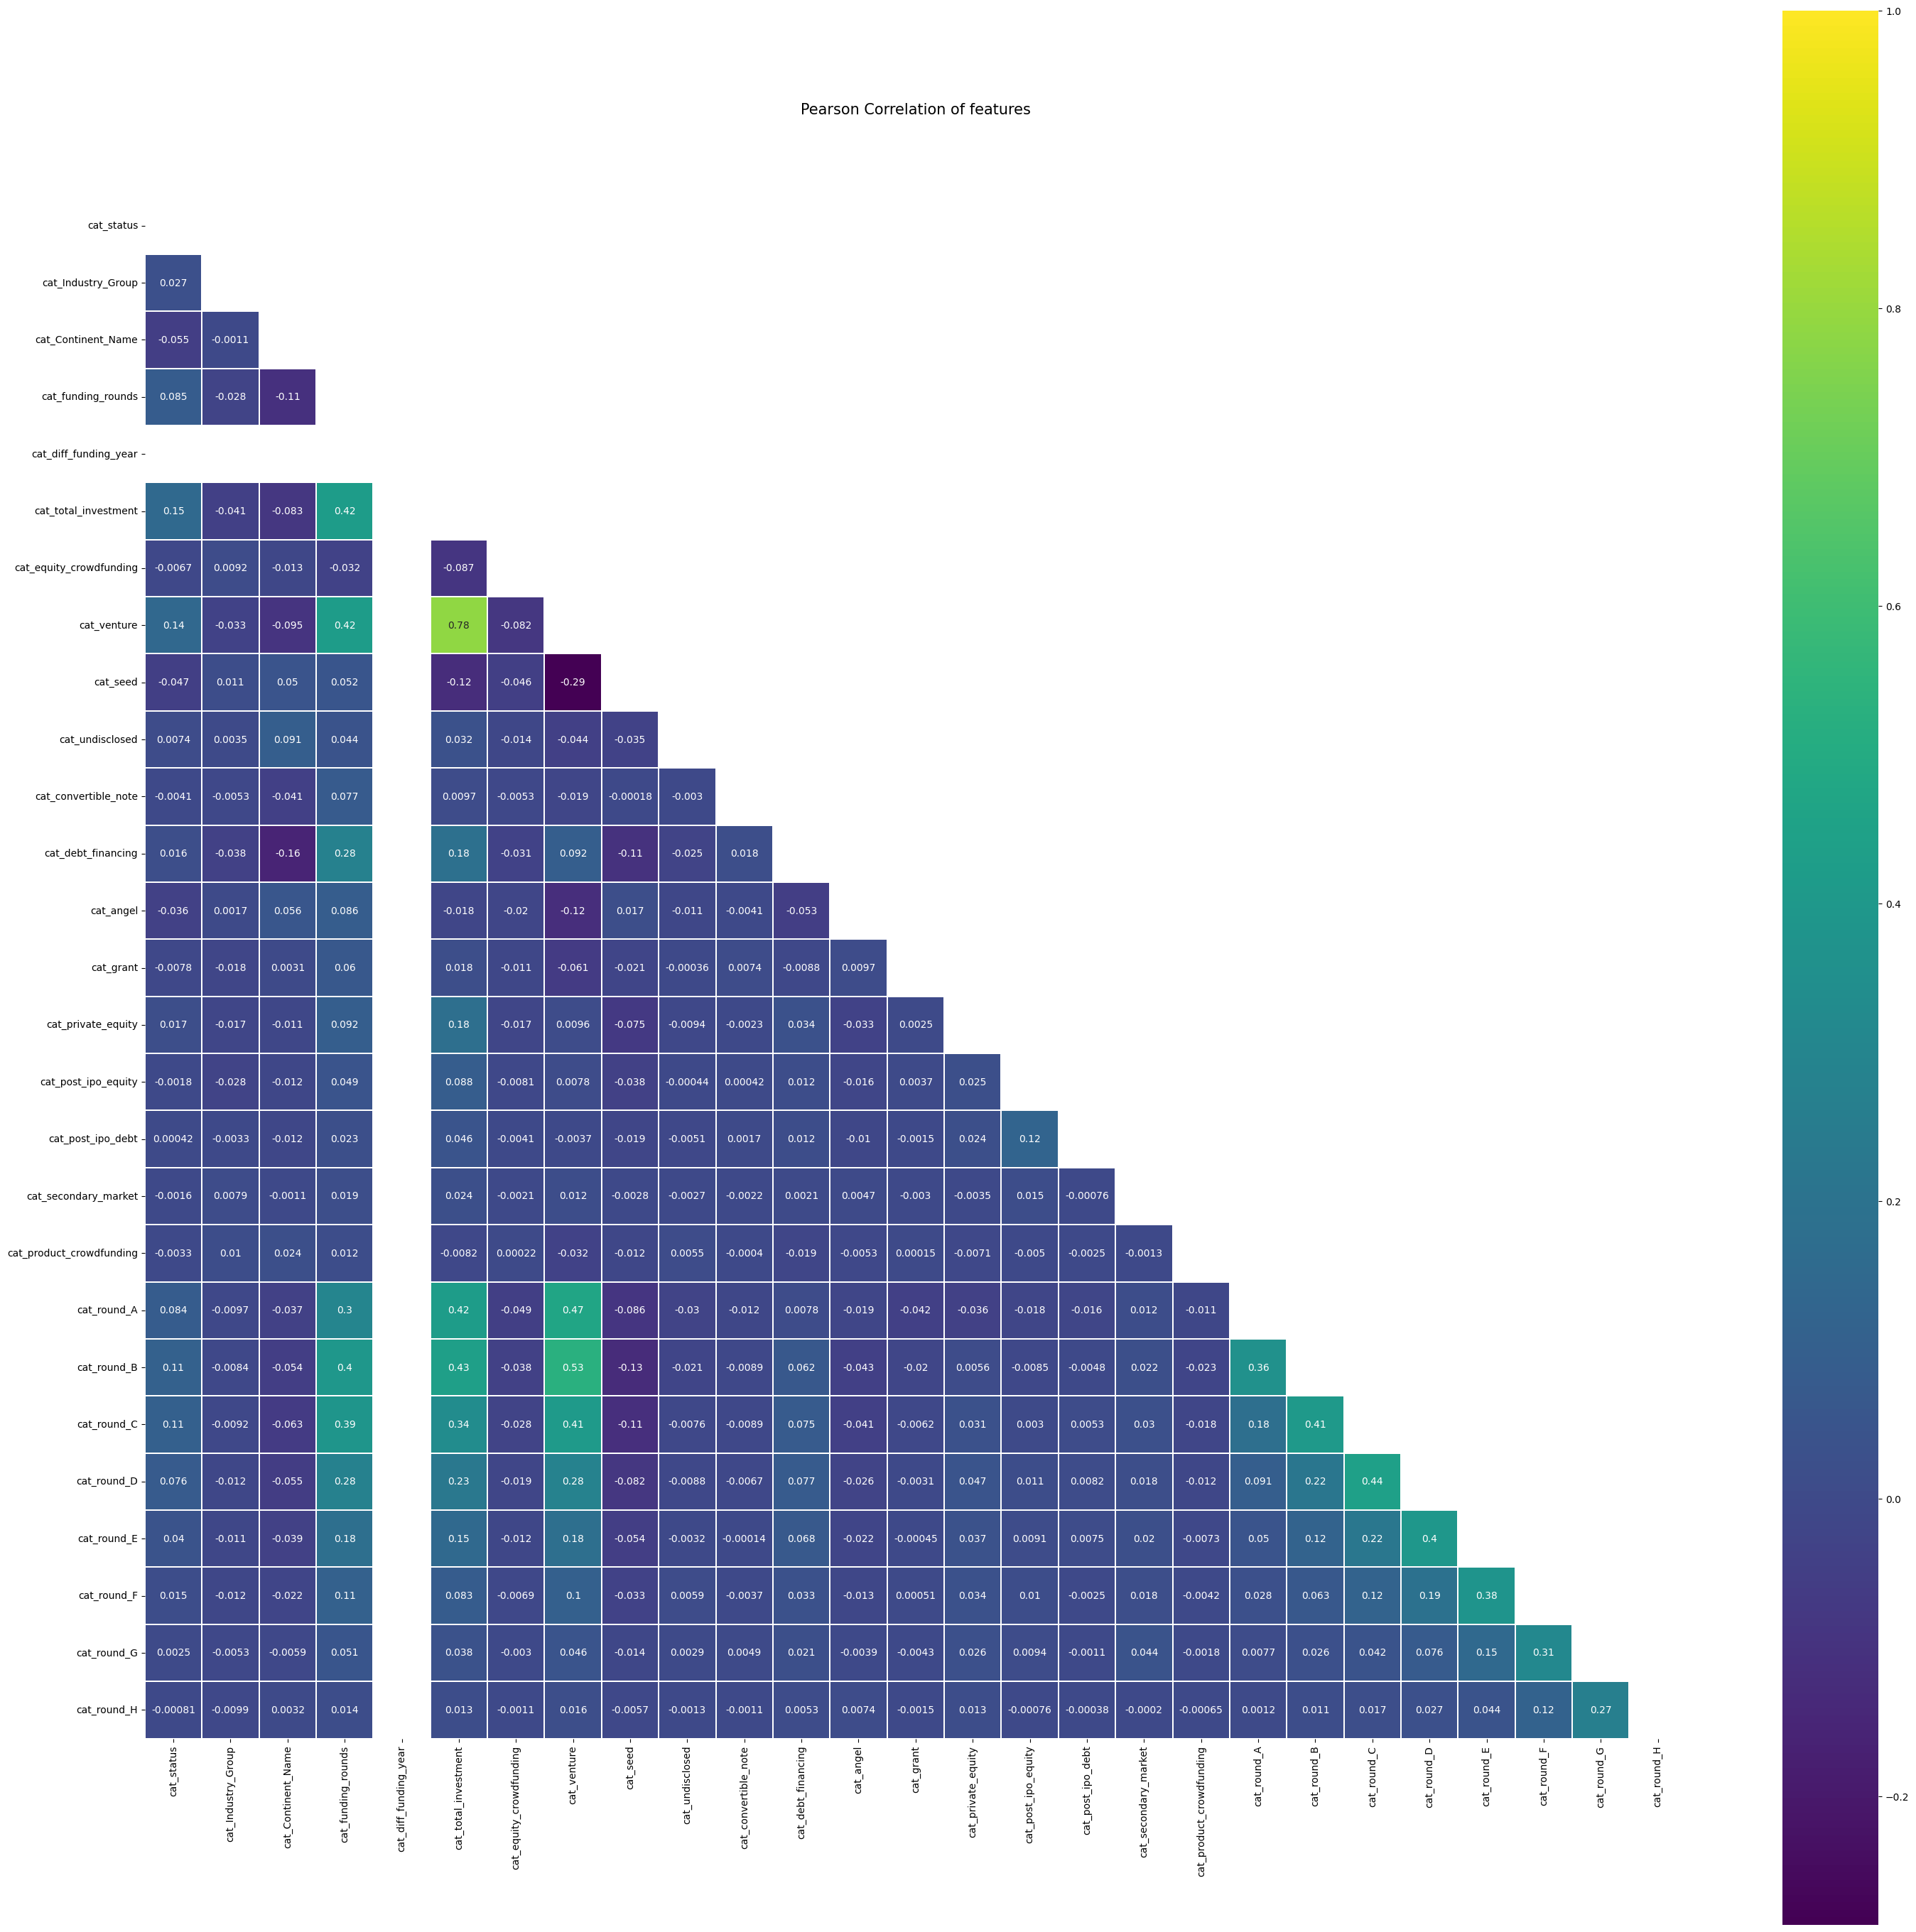

In [265]:
colormap = plt.cm.viridis
plt.figure(figsize=(35, 35))
plt.title('Pearson Correlation of features', y=1.05, size=15)

# Ensure the mask is created based on the current state of df3
correlation_matrix = df3.corr()
matrix = np.triu(correlation_matrix)

sns.heatmap(correlation_matrix, linewidth=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, mask=matrix)

In [266]:
df3.shape

(40449, 27)

In [267]:
#selecting the columns we need
#you can use this dataset for the model. Created after excluding columns with less correlation
df4 = df3[['cat_status', 'cat_Industry_Group', 'cat_Continent_Name',
       'cat_funding_rounds', 'cat_diff_funding_year', 'cat_total_investment', 'cat_venture', 'cat_seed', 'cat_debt_financing', 'cat_angel',
       'cat_private_equity', 'cat_round_A',
       'cat_round_B', 'cat_round_C', 'cat_round_D', 'cat_round_E',
       'cat_round_F']]
# shape of dataset
df4.shape

(40449, 17)

In [268]:
df4.dropna(inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_324\1595090722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.dropna(inplace=True)


In [269]:
df4.head()

,cat_status,cat_Industry_Group,cat_Continent_Name,cat_funding_rounds,cat_diff_funding_year,cat_total_investment,cat_venture,cat_seed,cat_debt_financing,cat_angel,cat_private_equity,cat_round_A,cat_round_B,cat_round_C,cat_round_D,cat_round_E,cat_round_F
0,2,11,1,0,0,2,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,11,3,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,9,3,0,0,2,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,1,1,0,0,2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1,38,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [270]:
df4.columns

Index(['cat_status', 'cat_Industry_Group', 'cat_Continent_Name',
       'cat_funding_rounds', 'cat_diff_funding_year', 'cat_total_investment',
       'cat_venture', 'cat_seed', 'cat_debt_financing', 'cat_angel',
       'cat_private_equity', 'cat_round_A', 'cat_round_B', 'cat_round_C',
       'cat_round_D', 'cat_round_E', 'cat_round_F'],
      dtype='object')

In [271]:
columns_to_drop = ['cat_Continent_Name', 'cat_diff_funding_year', 'cat_seed', 'cat_debt_financing',
                   'cat_angel', 'cat_private_equity', 'cat_round_D', 'cat_round_E', 'cat_round_F', 'cat_venture']

df4 = df4.drop(columns=columns_to_drop)


In [272]:
df4

,cat_status,cat_Industry_Group,cat_funding_rounds,cat_total_investment,cat_round_A,cat_round_B,cat_round_C
0,2,11,0,2,0.0,0.0,0.0
2,1,11,0,0,0.0,0.0,0.0
3,1,9,0,2,0.0,0.0,0.0
5,0,1,0,2,0.0,0.0,0.0
6,1,38,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
40437,1,9,0,3,0.0,0.0,0.0
40439,1,5,0,3,1.0,0.0,0.0
40444,1,5,0,2,1.0,0.0,0.0
40445,1,14,0,1,0.0,0.0,0.0


In [273]:
# Making new datafram that removes the operating value
df5 = df3.copy()
df5.drop(df5.index[df5['cat_status'] == 1], inplace = True)
# only 0 and 1, 0 means closed and 1 means acquired
df5 = df5.replace({'cat_status':2},1)

<Axes: title={'center': 'Pearson Correlation of features'}>

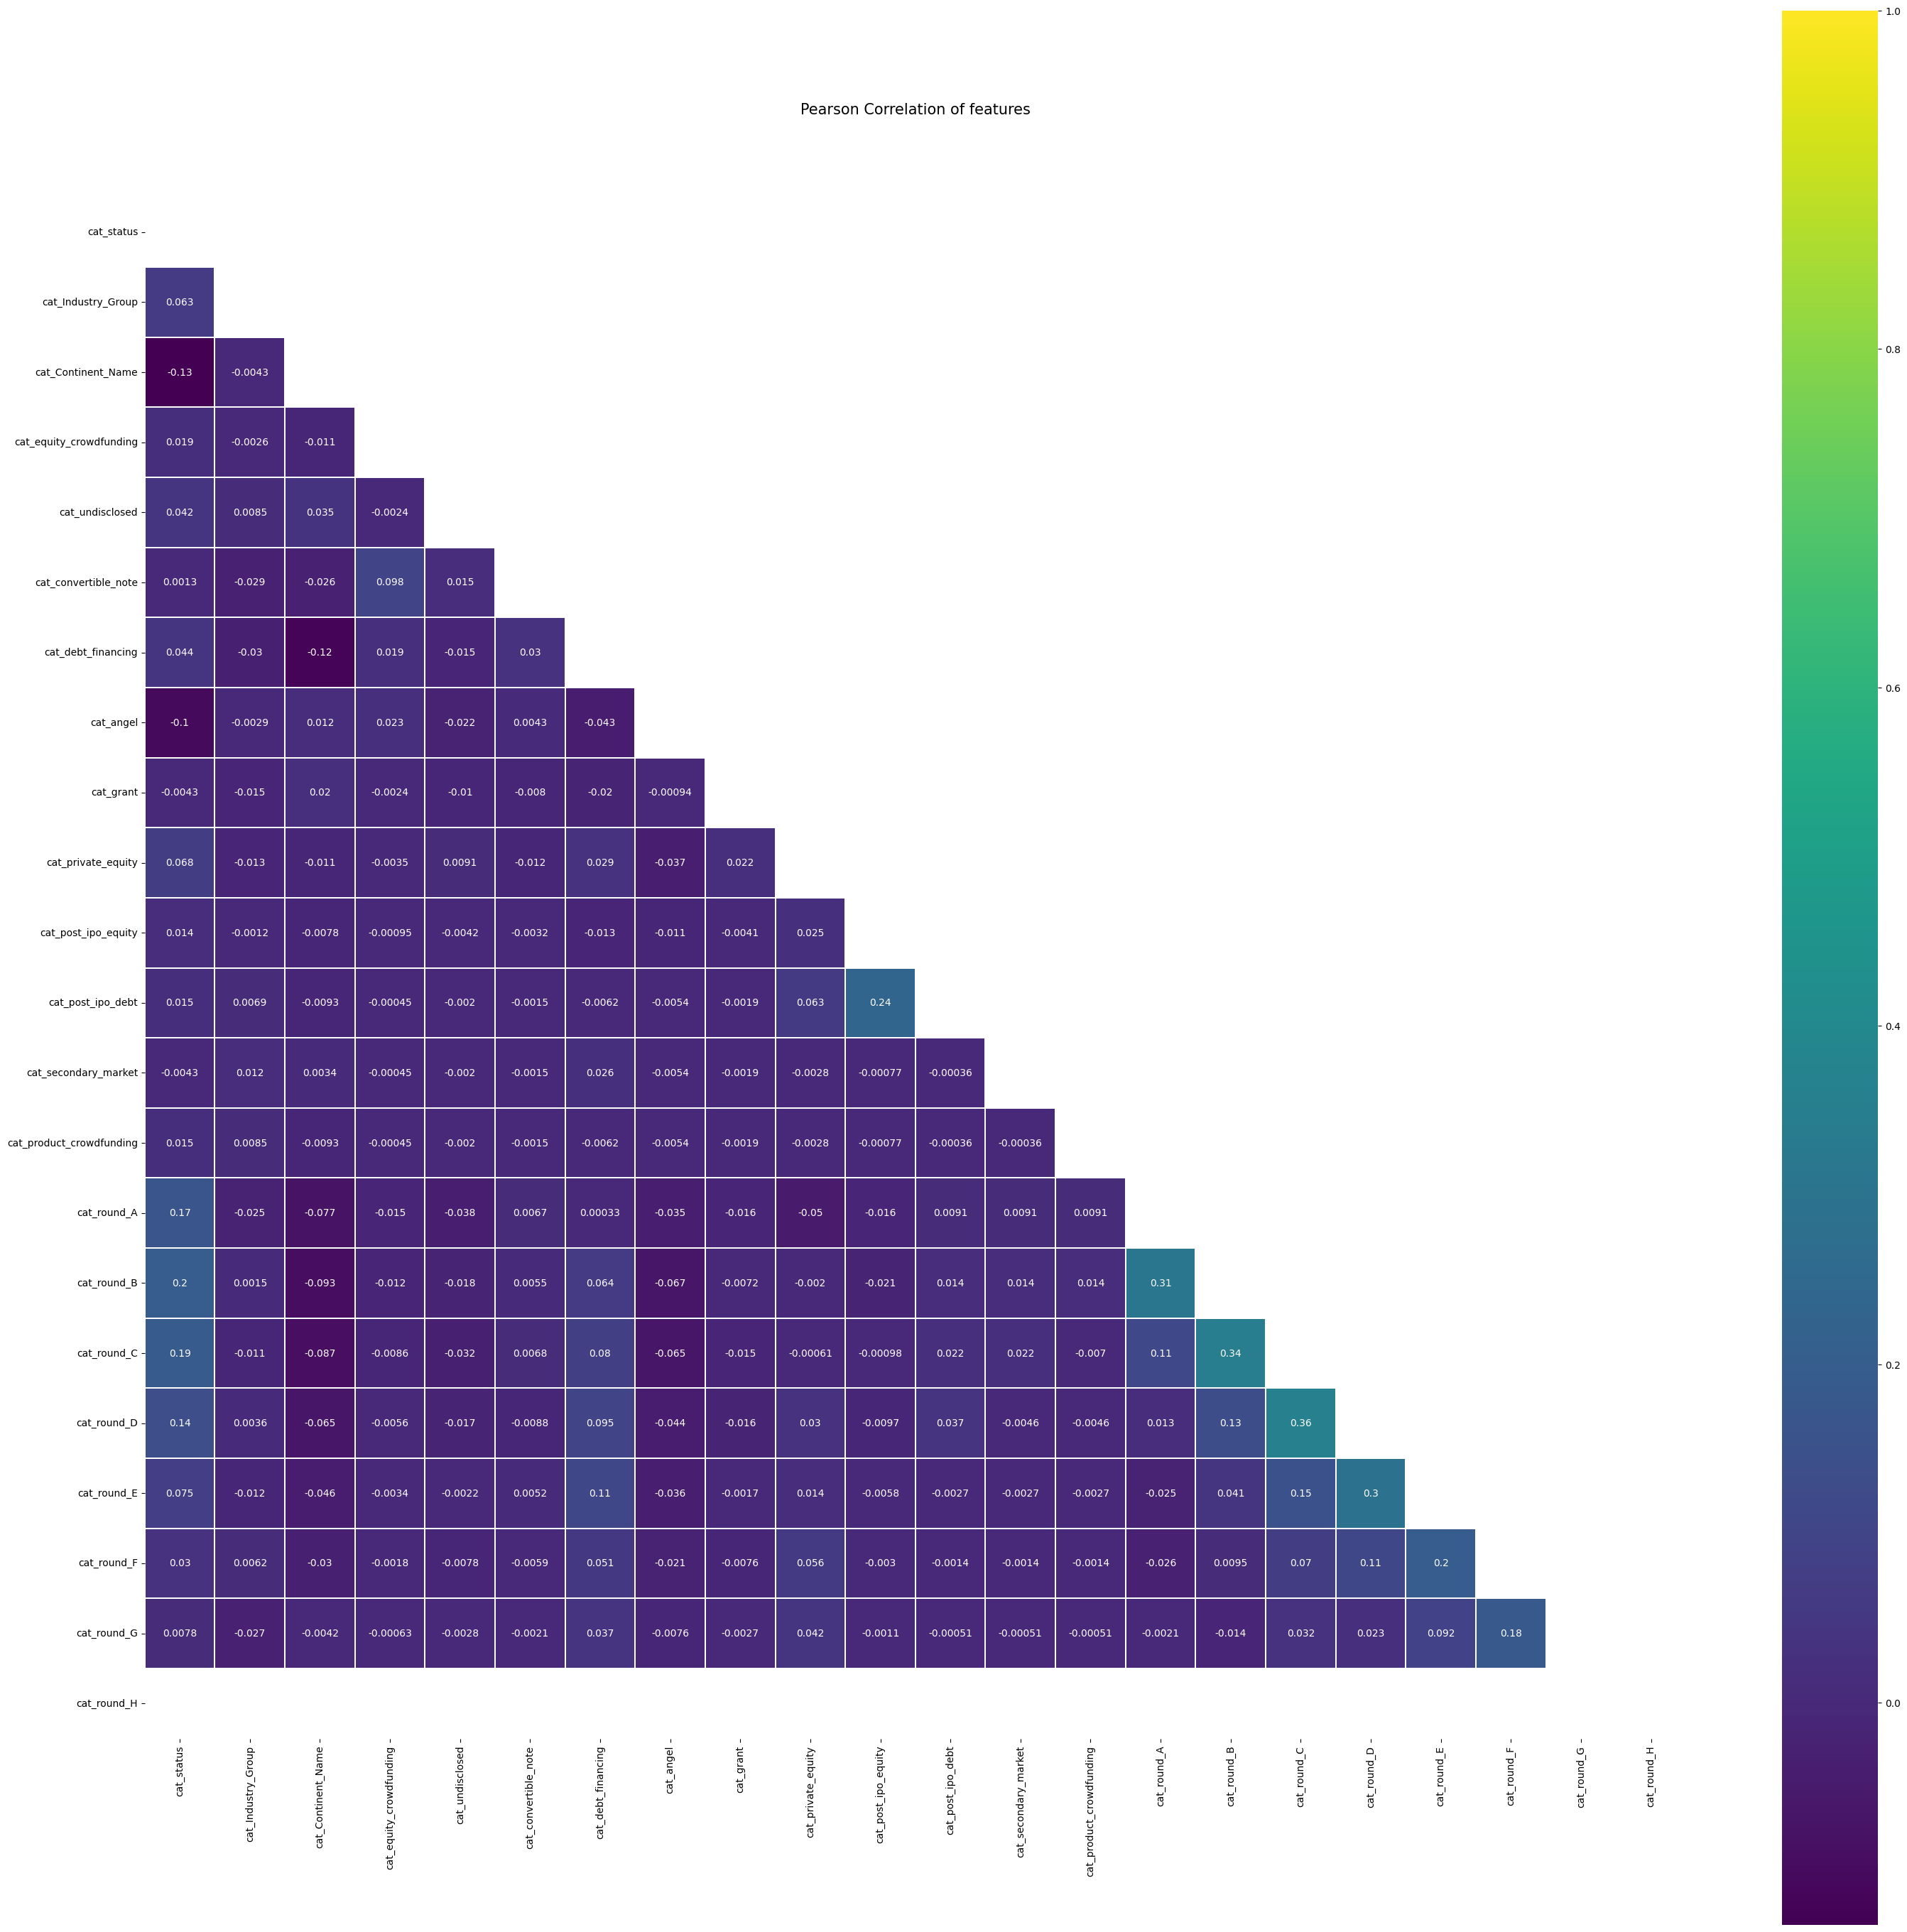

In [274]:
# Ensure only numeric columns are considered
df5_numeric = df5.select_dtypes(include=[float, int])

# Drop rows with NaN values (or you can choose to impute them)
df5_numeric = df5_numeric.dropna()

colormap = plt.cm.viridis
plt.figure(figsize=(35, 35))
plt.title('Pearson Correlation of features', y=1.05, size=15)

# Compute the correlation matrix and the mask
correlation_matrix = df5_numeric.corr()
matrix = np.triu(correlation_matrix)

sns.heatmap(correlation_matrix, linewidth=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, mask=matrix)

In [275]:
# selecting the columns we need based on the correlation matrix
df5 = df5[['cat_status', 'cat_Industry_Group', 'cat_Continent_Name',
       'cat_funding_rounds', 'cat_diff_funding_year', 'cat_total_investment', 'cat_venture', 'cat_seed', 'cat_debt_financing', 'cat_angel',
       'cat_private_equity', 'cat_round_A',
       'cat_round_B', 'cat_round_C', 'cat_round_D', 'cat_round_E',
       'cat_round_F']]

In [277]:
# number of companies
df5['cat_status'].count()

5497

In [254]:
#shape of dataframe
df5.shape

(5497, 17)

 **Modeling**

Decision Tree

Decision Tree is a flow-chart like tree structure where the internal mode is considered as a feature and the branches are considered as a decision rule. It learns to partition on the basis of the attribute value.

When we decide to use only default values on the decision tree model, the model is overfitting. We then use cost_complex_pruning_path from sklearn to find the most efficient alpha value that would help us prune the tree. The alpha value that would give the highest accuracy rate was used in the model. To tune the model, we also test with grid search. Tuning with cost_complex_pruning_path and grid search gives the same accuracy results but their decision tree looks very different from each other.

In [278]:
#setting Y variable
Y = df4.cat_status
#dropping status and setting features
X = df4.drop('cat_status', axis = 1)
#test and train dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

80% of the dataset -- Train the model
20% of the dataset -- Test the model

In [279]:
#checking size of each dataset
print('Shape of X_train=>',X_train.shape)
print('Shape of X_test=>',X_test.shape)
print('Shape of Y_train=>',Y_train.shape)
print('Shape of Y_test=>',Y_test.shape)

Shape of X_train=> (19768, 6)
Shape of X_test=> (4942, 6)
Shape of Y_train=> (19768,)
Shape of Y_test=> (4942,)


In [280]:
#testing with regular decision tree
clf = DecisionTreeClassifier(random_state = 100)
#train decison tree classifier
clf = clf.fit(X_train, Y_train)

In [281]:
# predict the response for test data
preds = clf.predict(X_test)
print(accuracy_score(Y_test,preds))
print(accuracy_score(Y_train,clf.predict(X_train)))

print('\nClassification Report\n')
print(classification_report(Y_test, preds, target_names=['Closed', 'Operating', 'Acquired']))
#accuracy score is high for training dataset which shows that it might be overfitting

0.8759611493322541
0.8751517604208823

Classification Report

              precision    recall  f1-score   support

      Closed       0.10      0.00      0.01       282
   Operating       0.88      0.99      0.93      4347
    Acquired       0.17      0.01      0.02       313

    accuracy                           0.88      4942
   macro avg       0.38      0.34      0.32      4942
weighted avg       0.79      0.88      0.82      4942



Accuracy score for the training dataset (0.89) is higher than that of the test dataset (0.84)  hence the model is overfitting

Overall accuracy of the model - 0.84

Optimize/ Tune the model

In [282]:
#using paramerters from the grid search to create the model
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf = 1, min_samples_split=2, random_state=40)
clf.fit(X_train,Y_train) #fitting into the model
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
#test and train score are closer

#accuracy score of test and train data.
print(accuracy_score(Y_train,y_train_pred),accuracy_score(Y_test,y_test_pred))
print('\nClassification Report\n')
print(classification_report(Y_test, y_test_pred, target_names=['Closed', 'Operating', 'Acquired'])) # classification report

0.8740894374747066 0.8779846216106839

Classification Report

              precision    recall  f1-score   support

      Closed       0.00      0.00      0.00       282
   Operating       0.88      1.00      0.94      4347
    Acquired       0.17      0.01      0.01       313

    accuracy                           0.88      4942
   macro avg       0.35      0.33      0.32      4942
weighted avg       0.78      0.88      0.82      4942



c:\Users\hp\Deployment_Startups\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\Deployment_Startups\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\Deployment_Startups\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


After optimization, the accuracy goes up to 0.86


In [ ]:
# #visual representation of the model
# xvar = df4.drop('cat_status', axis=1)
# feature_cols = xvar.columns
# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = feature_cols,class_names=['closed','operating','acquired'])

# (graph, ) = graph_from_dot_data(dot_data.getvalue())
# Image(graph.create_png())

NameError: name 'graph_from_dot_data' is not defined

In [283]:
feat_importance = clf.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(feature_cols, clf.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.rename(columns = {0:'FeatureImportance'}, inplace = True)
feat_imp.sort_values(by=['FeatureImportance'], ascending=False).head(6)#top 20 feature impacting decision tree split

,FeatureImportance
cat_funding_rounds,0.447125
cat_Industry_Group,0.399629
cat_diff_funding_year,0.065522
cat_total_investment,0.053309
cat_venture,0.034415
cat_Continent_Name,0.000000


Using the same classification model, we now tried predicting with a sample dataset.

In [284]:
#creating sample data frame to test the model and predict
sample_data = {'cat_Industry_Group': np.random.choice(range(0,42,1), size = (5)),
        'cat_Continent_Name': np.random.choice(range(0,5,1), size = (5)),
        'cat_funding_rounds': np.random.choice([0,1], size = (5)),
        'cat_diff_funding_year': np.random.choice([0,1], size = (5)),
        'cat_total_investment': np.random.choice([0,1,2,3], size = (5)),
        'cat_venture': np.random.choice([0,1,2,3], size = (5)),
        'cat_seed': np.random.choice([0,1], size = (5)),
        'cat_debt_financing': np.random.choice([0,1], size = (5)),
        'cat_angel': np.random.choice([0,1], size = (5)),
        'cat_private_equity': np.random.choice([0,1], size = (5)),
        'cat_round_A': np.random.choice([0,1], size = (5)),
        'cat_round_B': np.random.choice([0,1], size = (5)),
        'cat_round_C': np.random.choice([0,1], size = (5)),
        'cat_round_D': np.random.choice([0,1], size = (5)),
        'cat_round_E': np.random.choice([0,1], size = (5)),
        'cat_round_F': np.random.choice([0,1], size = (5))
       }
sample = pd.DataFrame(sample_data, index=[0,1,2,3,4])
sample # sample dataset

,cat_Industry_Group,cat_Continent_Name,cat_funding_rounds,cat_diff_funding_year,cat_total_investment,cat_venture,cat_seed,cat_debt_financing,cat_angel,cat_private_equity,cat_round_A,cat_round_B,cat_round_C,cat_round_D,cat_round_E,cat_round_F
0,10,0,1,0,2,3,0,0,1,1,0,1,1,0,0,0
1,37,1,1,0,3,3,0,1,1,0,0,0,1,0,0,1
2,18,0,0,1,0,1,1,1,0,0,1,1,1,1,0,0
3,33,3,0,1,3,2,0,0,1,1,0,1,1,0,1,1
4,9,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1


In [285]:
ynew = clf.predict(sample)
ynew #predicted value from the sample dataset. 0 means close, 1 measn operating, 2 means acquired

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- cat_Continent_Name
- cat_angel
- cat_debt_financing
- cat_diff_funding_year
- cat_private_equity
- ...


According to this model, total investment, funding rounds, industry group, continent name are important features in understanding if a company will be successful or not. The model shows that total investment is very important and if it is less then the company is likely to be closed.

In [ ]:
# #Calculating feature importance
# feat_importance5 = clf_pruned5.tree_.compute_feature_importances(normalize=False)
# feat_imp_dict5 = dict(zip(feature_cols5, clf_pruned5.feature_importances_))
# feat_imp5 = pd.DataFrame.from_dict(feat_imp_dict5, orient='index')
# feat_imp5.rename(columns = {0:'FeatureImportance'}, inplace = True)
# feat_imp5.sort_values(by=['FeatureImportance'], ascending=False).head()#top 5 feature impacting decision tree split

NameError: name 'clf_pruned5' is not defined

Using this model, we now try predicting with a sample dataset.

Model: Random Forest

Random forest consists of a large number of individual decision trees that operate on ensemble. Ensemble method means that multiple models are generated and combined to solve the problem. For Random Forest, each individual tree in a random forest spits out a class prediction and the class with the most votes is the model’s prediction

 It showed that Industry Group is the most important feature.

In [286]:
Y = df4.cat_status
X = df4.drop('cat_status', axis = 1) #setting features
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)# test and train dataset

In [287]:
rfc = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rfc.fit(X_train, Y_train)#training the model

RandomForestClassifier(n_estimators=1000, random_state=42)

In [288]:
rfc_pred_test = rfc.predict(X_test)
print(classification_report(Y_test, rfc_pred_test, target_names=['Class 1', 'Class 2', 'Class 3'])) # model is overfitting for class2 and bad at fitting 1 and 3

              precision    recall  f1-score   support

     Class 1       0.00      0.00      0.00       282
     Class 2       0.88      1.00      0.93      4347
     Class 3       0.22      0.01      0.02       313

    accuracy                           0.88      4942
   macro avg       0.37      0.34      0.32      4942
weighted avg       0.79      0.88      0.82      4942



It shows that Industry Group is the most important feature. The important features are as follows:

In [289]:
# Get numerical feature importances
importances = list(rfc.feature_importances_)
feature_list = list(X.columns)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: cat_Industry_Group   Importance: 0.7
Variable: cat_total_investment Importance: 0.14
Variable: cat_round_B          Importance: 0.06
Variable: cat_round_A          Importance: 0.05
Variable: cat_round_C          Importance: 0.05
Variable: cat_funding_rounds   Importance: 0.0


We use random grid search for hyper parameter tuning where-- 'n_estimators': 1600, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True. Using these parameter the accuracy rate comes up to be 0.86

In [290]:
rfc = RandomForestClassifier(n_estimators = 1600, min_samples_split= 2, min_samples_leaf= 4, max_features= "sqrt", max_depth =10, bootstrap = True, random_state = 42)
rfc.fit(X_train, Y_train)

rfc_pred_test = rfc.predict(X_test)
print(classification_report(Y_test, rfc_pred_test, target_names=['Class 1', 'Class 2', 'Class 3']))

              precision    recall  f1-score   support

     Class 1       0.00      0.00      0.00       282
     Class 2       0.88      1.00      0.94      4347
     Class 3       0.33      0.00      0.01       313

    accuracy                           0.88      4942
   macro avg       0.40      0.33      0.31      4942
weighted avg       0.79      0.88      0.82      4942



c:\Users\hp\Deployment_Startups\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\Deployment_Startups\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\Deployment_Startups\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


We use the model to predict for a sample dataset

In [291]:
#creating sample data frame to test the model and predict
sample_data = {'cat_Industry_Group': np.random.choice(range(0,42,1), size = (5)),
        'cat_Continent_Name': np.random.choice(range(0,5,1), size = (5)),
        'cat_funding_rounds': np.random.choice([0,1], size = (5)),
        'cat_diff_funding_year': np.random.choice([0,1], size = (5)),
        'cat_total_investment': np.random.choice([0,1,2,3], size = (5)),
        'cat_venture': np.random.choice([0,1,2,3], size = (5)),
        'cat_seed': np.random.choice([0,1], size = (5)),
        'cat_debt_financing': np.random.choice([0,1], size = (5)),
        'cat_angel': np.random.choice([0,1], size = (5)),
        'cat_private_equity': np.random.choice([0,1], size = (5)),
        'cat_round_A': np.random.choice([0,1], size = (5)),
        'cat_round_B': np.random.choice([0,1], size = (5)),
        'cat_round_C': np.random.choice([0,1], size = (5)),
        'cat_round_D': np.random.choice([0,1], size = (5)),
        'cat_round_E': np.random.choice([0,1], size = (5)),
        'cat_round_F': np.random.choice([0,1], size = (5))
       }
sample = pd.DataFrame(sample_data, index=[0,1,2,3,4])
ynew = rfc.predict(sample)
ynew # 0 means close, 1 means operating and 2 means acquired

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- cat_Continent_Name
- cat_angel
- cat_debt_financing
- cat_diff_funding_year
- cat_private_equity
- ...


According to the model the important features are:

In [292]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


We use this model to predict for a sample dataframe.

In [293]:
#creating sample data frame to test the model and predict
sample_data = {'cat_Industry_Group': np.random.choice(range(0,42,1), size = (5)),
        'cat_Continent_Name': np.random.choice(range(0,5,1), size = (5)),
        'cat_funding_rounds': np.random.choice([0,1], size = (5)),
        'cat_diff_funding_year': np.random.choice([0,1], size = (5)),
        'cat_total_investment': np.random.choice([0,1,2,3], size = (5)),
        'cat_venture': np.random.choice([0,1,2,3], size = (5)),
        'cat_seed': np.random.choice([0,1], size = (5)),
        'cat_debt_financing': np.random.choice([0,1], size = (5)),
        'cat_angel': np.random.choice([0,1], size = (5)),
        'cat_private_equity': np.random.choice([0,1], size = (5)),
        'cat_round_A': np.random.choice([0,1], size = (5)),
        'cat_round_B': np.random.choice([0,1], size = (5)),
        'cat_round_C': np.random.choice([0,1], size = (5)),
        'cat_round_D': np.random.choice([0,1], size = (5)),
        'cat_round_E': np.random.choice([0,1], size = (5)),
        'cat_round_F': np.random.choice([0,1], size = (5))
       }
sample = pd.DataFrame(sample_data, index=[0,1,2,3,4])

In [ ]:
# ynew = clf_pruned5.predict(sample)
# ynew # predicting using decision tree binomial model. 0 means closed and 1 means acquired

NameError: name 'clf_pruned5' is not defined

SVM Model

In [294]:
from sklearn.svm import SVC
from joblib import dump
import os

In [295]:
Y = df4.cat_status #setting Y variable
X = df4.drop('cat_status', axis = 1) #dropping status and setting features
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)#test and train dataset

In [296]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Assuming X and y are your features and target variable
# Replace NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_imputed, Y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)

# Fit the model to the training data
svm_classifier.fit(X_train, Y_train)

# Make predictions on the test set
svm_predictions = svm_classifier.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(Y_test, svm_predictions)
print(f'SVM Accuracy: {svm_accuracy}')
print('Classification Report:')
print(classification_report(Y_test, svm_predictions))


SVM Accuracy: 0.8796033994334278
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       282
           1       0.88      1.00      0.94      4347
           2       0.00      0.00      0.00       313

    accuracy                           0.88      4942
   macro avg       0.29      0.33      0.31      4942
weighted avg       0.77      0.88      0.82      4942



c:\Users\hp\Deployment_Startups\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\Deployment_Startups\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\Deployment_Startups\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Saving the model for deployment 

In [297]:
!pip install joblib

You should consider upgrading via the 'C:\Users\hp\Deployment_Startups\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [298]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from joblib import dump

# Assuming X_train and y_train are your training data
# Define and train your SVM model
svm_pipeline = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1.0))
svm_pipeline.fit(X_train, Y_train)

# Save the trained model to a file
dump(svm_pipeline, 'svm_model.joblib')


['svm_model.joblib']

In [299]:
from joblib import dump

# Save the trained model
dump(svm_pipeline, 'svm_model.joblib')


['svm_model.joblib']

In [300]:
from joblib import load

# Load the saved model
svm_model = load('svm_model.joblib')


Optimizing the SVM model

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have obtained the best SVM parameters from a grid search
best_svm_params = {
    'C': 1.0,
    'kernel': 'rbf',
    'gamma': 'scale'
}

# Create an SVM classifier with the best parameters
svm_classifier = SVC(**best_svm_params, random_state=42)

# Fit the model to the training data
svm_classifier.fit(X_train, Y_train)

# Make predictions on the test set
svm_pred_test = svm_classifier.predict(X_test)

# Print the accuracy score of the test data
print(f'Accuracy Score: {accuracy_score(Y_test, svm_pred_test)}')

# Print the classification report
print('\nClassification Report\n')
print(classification_report(Y_test, svm_pred_test, target_names=['Closed', 'Operating', 'Acquired']))


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(Y_test, svm_pred_test, average='weighted')
recall = recall_score(Y_test, svm_pred_test, average='weighted')
f1 = f1_score(Y_test, svm_pred_test, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')


Conclusion

Total investment, Industry and continent respectively are important features. We received the best result when we used SVM. Hence we deployed the SVM model using streamlit

